# **Prediction of Applicants' Defaults** 

This project was supervised by Oliver Wyman Company. In this Project, I want to do prediction for the Default values of Bank's clients. There are two kinds of attributes: Numerical and Categorical attributes. 

**Categorical Attributes**:
Occupation, Marital Status, Observation Date (which is treated as categorical attribute in this analysis)

**Numerical Attributes**: Income, Loan_amount_requsted, Term Length, Installment/Income, Schufa credit Score, Number of Applicants


The Target attribute is bianry(0 or 1). **Target 1 means giving loan to the customer and Target 0 means not giving loan to the customer and rejecting the application.**

The Dataset is with dimension of 10000 rows and 11 columns (variables), starting from  year 2008 till 2016.



# **1. File Directory**

Codes below are used to mount google colab with google drive and set the directory.

In [1]:
# Mounting the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Set the Directory
%cd '/content/drive/MyDrive/Colab Notebooks/Machine Learning'

/content/drive/MyDrive/Colab Notebooks/Machine Learning


#**2.  Libraries**

Importing necessary Packages



In [3]:
import pandas as pd
import numpy as np


# Math and Calculas Libraries 
import math


# Statistical libraries
from scipy import stats


# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.experimental import enable_iterative_imputer      # for Missing values Imputations.
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler




# Ensemble methods or feature selection
from sklearn.ensemble import RandomForestClassifier




# Evaluation Procedures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

# GridSearch
from sklearn.model_selection import GridSearchCV



# Classification methods
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier










# Evaluation Metrics
from sklearn import metrics 
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report



# <pde;s
from sklearn.linear_model import Lasso
from sklearn import linear_model
from sklearn import naive_bayes
from sklearn import neighbors
from sklearn import tree

# **3. Preprocessing**

##**3.1)  Loading Data**

In [4]:
# importing the dataset
df =  pd.read_csv('Quant_Challenge_data_amended.csv')

In [5]:
df   # dataframe

Unnamed: 0              income loan_amount term_length  \
0              0  18785.517943694504       12300        67.0   
1              1  12861.495159877606  Not avail.       113.0   
2              2  14886.776341632107       10700  Not avail.   
3              3          Not avail.       33000       112.0   
4              4  15897.753806874589       19900        59.0   
...          ...                 ...         ...         ...   
9995        9995  23743.298597870573       21900        66.0   
9996        9996  29675.270560110708       27600        35.0   
9997        9997  33213.332694936864       16300        80.0   
9998        9998     32915.869976451       15900        67.0   
9999        9999   34332.32263011122       32700        34.0   

            install_to_inc     occup     marital              schufa  \
0     0.009772532761805456       NaN      Single   7106.014471346445   
1     0.003509136597401741  Employee    Divorced   7694.806893720367   
2     0.013310346283231944    Worker      Single   7142.496337537019   
3     0.004760874885112928  Employee      Single  7446.1706118576485   
4      0.02121608748572823    Worker   Separated   7241.656646188094   
...                    ...       ...         ...                 ...   
9995  0.013975235178482785    Worker      Single   9703.314402264712   
9996  0.026573352616080972    Worker    Divorced   9669.092140025425   
9997  0.006134584622128578  Employee     Married          Not avail.   
9998  0.007209696508267958       NaN     Married   8465.696435727588   
9999  0.028013388905964536    Worker  Not avail.  10485.846053006724   

     num_applic              OBS_DATE  target_var  
0             1  18JUL2018 - 00:00:00         NaN  
1             1  16JUL2018 - 00:00:00           0  
2             1  21DEC2010 - 00:00:00           1  
3             1  05NOV2015 - 00:00:00           0  
4             1  13JUL2015 - 00:00:00           1  
...         ...                   ...         ...  
9995          1  23NOV2016 - 00:00:00           0  
9996          1  19DEC2010 - 00:00:00           0  
9997          2  06AUG2012 - 00:00:00           0  
9998          2  04FEB2017 - 00:00:00           0  
9999          1  25OCT2013 - 00:00:00  Not avail.  

[10000 rows x 11 columns]

##**3.2)  Data Cleaning and Quality Checking**

In [6]:
df = df.drop(df.columns[[0]], axis=1)   # deleting the extra unname column
df.head(5)                              # showing first 5 rows

income loan_amount term_length        install_to_inc     occup  \
0  18785.517943694504       12300        67.0  0.009772532761805456       NaN   
1  12861.495159877606  Not avail.       113.0  0.003509136597401741  Employee   
2  14886.776341632107       10700  Not avail.  0.013310346283231944    Worker   
3          Not avail.       33000       112.0  0.004760874885112928  Employee   
4  15897.753806874589       19900        59.0   0.02121608748572823    Worker   

     marital              schufa num_applic              OBS_DATE target_var  
0     Single   7106.014471346445          1  18JUL2018 - 00:00:00        NaN  
1   Divorced   7694.806893720367          1  16JUL2018 - 00:00:00          0  
2     Single   7142.496337537019          1  21DEC2010 - 00:00:00          1  
3     Single  7446.1706118576485          1  05NOV2015 - 00:00:00          0  
4  Separated   7241.656646188094          1  13JUL2015 - 00:00:00          1

In [7]:
df.dtypes      # type of all variables isobject. Later type of each variable will be changed according to it's attribute type.

income            object
loan_amount       object
term_length       object
install_to_inc    object
occup             object
marital           object
schufa            object
num_applic        object
OBS_DATE          object
target_var        object
dtype: object

In [8]:
df['OBS_DATE'] = df['OBS_DATE'].str.replace(" - 00:00:00","")        # Removing the time from OBS_DATE variable, because there is no meaning and time "00:00:00" is same for all data.


In [9]:
df.head()

income loan_amount term_length        install_to_inc     occup  \
0  18785.517943694504       12300        67.0  0.009772532761805456       NaN   
1  12861.495159877606  Not avail.       113.0  0.003509136597401741  Employee   
2  14886.776341632107       10700  Not avail.  0.013310346283231944    Worker   
3          Not avail.       33000       112.0  0.004760874885112928  Employee   
4  15897.753806874589       19900        59.0   0.02121608748572823    Worker   

     marital              schufa num_applic   OBS_DATE target_var  
0     Single   7106.014471346445          1  18JUL2018        NaN  
1   Divorced   7694.806893720367          1  16JUL2018          0  
2     Single   7142.496337537019          1  21DEC2010          1  
3     Single  7446.1706118576485          1  05NOV2015          0  
4  Separated   7241.656646188094          1  13JUL2015          1

In [10]:
# Changing the format of the date in OBS_DATE variable to standard date format.


df['OBS_DATE'] = df['OBS_DATE'].str.replace('JUL','-07-')
df['OBS_DATE'] = df['OBS_DATE'].str.replace('JUN','-06-')
df['OBS_DATE'] = df['OBS_DATE'].str.replace('AUG','-08-')
df['OBS_DATE'] = df['OBS_DATE'].str.replace('SEP','-09-')
df['OBS_DATE'] = df['OBS_DATE'].str.replace('OCT','-10-')
df['OBS_DATE'] = df['OBS_DATE'].str.replace('NOV','-11-')
df['OBS_DATE'] = df['OBS_DATE'].str.replace('JAN','-01-')
df['OBS_DATE'] = df['OBS_DATE'].str.replace('FEB','-02-')
df['OBS_DATE'] = df['OBS_DATE'].str.replace('MAR','-03-')
df['OBS_DATE'] = df['OBS_DATE'].str.replace('APR','-04-')
df['OBS_DATE'] = df['OBS_DATE'].str.replace('MAY','-05-')
df['OBS_DATE'] = df['OBS_DATE'].str.replace('DEC','-12-')

In [11]:
df.head()

income loan_amount term_length        install_to_inc     occup  \
0  18785.517943694504       12300        67.0  0.009772532761805456       NaN   
1  12861.495159877606  Not avail.       113.0  0.003509136597401741  Employee   
2  14886.776341632107       10700  Not avail.  0.013310346283231944    Worker   
3          Not avail.       33000       112.0  0.004760874885112928  Employee   
4  15897.753806874589       19900        59.0   0.02121608748572823    Worker   

     marital              schufa num_applic    OBS_DATE target_var  
0     Single   7106.014471346445          1  18-07-2018        NaN  
1   Divorced   7694.806893720367          1  16-07-2018          0  
2     Single   7142.496337537019          1  21-12-2010          1  
3     Single  7446.1706118576485          1  05-11-2015          0  
4  Separated   7241.656646188094          1  13-07-2015          1

In [12]:
# df.target_var.hist()

target_var
0             7982
1             1454
Not avail.     296
dtype: int64


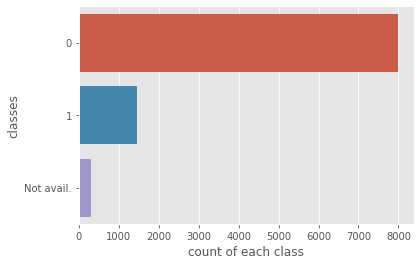

In [13]:
#Print class freq. through pandas 

print(df.groupby('target_var').size()) #"target" is the name of the target column, change it accordingly to your dataset

#some imports to plot 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

#Visualize Class Counts
sns.countplot(y=df.target_var ,data=df) #"target" is the name of the target column, change it accordingly to your dataset
plt.xlabel("count of each class")
plt.ylabel("classes")
plt.show()
print()       

As can be Seen in above digram, There is huge discrepancy between target 0 and 1. Targets with "Notavail" values are removed in the next steps of preprocessing which is called **Missing Values Removal and Imputation**. This difference will be balanced before modeling process. balancing target values is called **Sampling**.

In [14]:
# 296/(296+1454+7982)= 0.03    so  less than 0.05, we can  remove the missing values

In [15]:
df.isnull().sum()   # showing missing values for each variable


income            308
loan_amount       310
term_length       319
install_to_inc    297
occup             312
marital           293
schufa            287
num_applic        311
OBS_DATE          263
target_var        268
dtype: int64

In [16]:
df.isnull().sum().sum()    

2968

Total Missing values for dataframe is  **2968** and all data we have is **10000**. Having such high proportion of missing values, we can not easily delete corresponding rows, beacuse we would lose one-third of the available data.
Source of missing values can be **Missing Completely At Random (MCAR)**, **Missing At Random (MAR)**, **Missing Not At Random (MNAR)**.

**Missing Completely At Random (MCAR):**  In this case, there is no relationship between the missing data and any other values observed or unobserved (the data which is not recorded) within the given datase.That is, missing values are completely independent of other data. There is no pattern.

**Missing At Random (MAR):**  Missing at random (MAR) means that the reason for missing values can be explained by variables on which you have complete information as there is some relationship between the missing data and other values/data. In this case, the data is not missing for all the observations. It is missing only within sub-samples of the data and there is some pattern in the missing values.

**Missing Not At Random (MNAR):**  Missing values depend on the unobserved data.
If there is some structure/pattern in missing data and other observed data can not explain it, then it is Missing Not At Random (MNAR).



**************************  *** In this case, it seems to be that Missing values are of type MCAR or MAR, they can be deleted. To be mentioned that it missing values type is MNAR, then it should not be deleted.
**Deleting all corresponding rows of missing values, evaluation_index of above 90% for ROC criteria (Logistic Regression Classifier model) is obatined which will be analysed at last part of the Scripts.**









In [17]:
df = df.dropna(subset=['target_var'])       # deleting the rows that have missing values on target function, due to dependency of target variable and avoiding the risk of assigning wrong value for the target. 
df = df[df["target_var"]!="Not avail."]     # Not avai. values are also considered as missing values and thereby their corresponding rows should be deleted.
df = df.reset_index()                       # after removing missing values indexes of rows change. In order to restore ordering index  .reset_index is applied.
df =df.drop( columns = ['index'])           # deleting extra column "index" which was created due to previous command.
df.head()

income loan_amount term_length        install_to_inc     occup  \
0  12861.495159877606  Not avail.       113.0  0.003509136597401741  Employee   
1  14886.776341632107       10700  Not avail.  0.013310346283231944    Worker   
2          Not avail.       33000       112.0  0.004760874885112928  Employee   
3  15897.753806874589       19900        59.0   0.02121608748572823    Worker   
4  30494.619635750943       28500        38.0   0.02459450253712046    Worker   

     marital              schufa num_applic    OBS_DATE target_var  
0   Divorced   7694.806893720367          1  16-07-2018          0  
1     Single   7142.496337537019          1  21-12-2010          1  
2     Single  7446.1706118576485          1  05-11-2015          0  
3  Separated   7241.656646188094          1  13-07-2015          1  
4   Divorced   6566.899666826923          1  25-01-2016          1

In [18]:
df = df.replace("Not avail.", np.nan)     # changing "Not avail."  to np.nan  (missing value)  (assuming that both are the same.)

In [19]:
df.duplicated().sum()    

0

 No duplicated Value!

Deleting all rows that have atleast one missing value.

In [20]:
df= df.dropna()   

In [21]:
df.dtypes

income            object
loan_amount       object
term_length       object
install_to_inc    object
occup             object
marital           object
schufa            object
num_applic        object
OBS_DATE          object
target_var        object
dtype: object

As can be seen above, all of the variable types are object(string). Each variable's type should be change based on it's values for the processing and modeling steps.

In [22]:
df = df.astype({"income": np.float64, "loan_amount": np.float64, "term_length":np.float64, "install_to_inc": np.float64, "schufa": np.float64, "num_applic": np.int64, "target_var": np.int64})

# target and num_applic variable' types are assumed to be integer for the statistical anlysis and better data visualization.

In [23]:
df.dtypes

income            float64
loan_amount       float64
term_length       float64
install_to_inc    float64
occup              object
marital            object
schufa            float64
num_applic          int64
OBS_DATE           object
target_var          int64
dtype: object

Despite the previos mentioned scenario **deleting missing values**, **Missing Value Imputation** can alse be implemented over missing values. Following this Scenario leads to a very poor performance of the models(about 50%-40%), showing that data are very personolized and sensitive. However there are different methods of missing values imputation including Iterative method, Knn Imputor and mean-mode-median replacement, ... , among which KKN Imputer is described in the following  cell. 



### **KNN Imputation**

****Uncomment following cell incase you want see the result based on KNN Imputation method.

In [24]:
# # df = df.replace("Not avail.", np.nan)     # changing "Not avail."  to np.nan  (missing value)  (assuming that both are the same.)
# df = df.fillna(0)
# df = df.astype({"income": np.float64, "loan_amount": np.float64, "term_length":np.float64, "install_to_inc": np.float64, "schufa": np.float64, "num_applic": np.int64, "target_var": np.int64})
# df =df.mask(df == 0)     # masking zero values with NaN
# df1 = df.copy()
# target = df1["target_var"]
# target = target.replace( np.nan , 0)
# OBS_DATE = df1['OBS_DATE']
# df1 = df1.drop(columns =['target_var','OBS_DATE' ] )

# df1['occup'] = df1.occup.map({'Worker':0,  'Employee' : 1, 'Student':2, "1" :3 , "2":4, "3":5   })                 # changing the categorical lables to numerical for the next implementation(KNNImputer)
# df1["marital"] = df1.marital.map({ "Single":0, "Separated": 1 , "Divorced":2, "Married":3 , "Living together": 4  })


# df1_numeric = df1.drop(columns = ['marital', 'num_applic', 'occup'])
# df1_categorical = df1[["num_applic", "marital", "occup"]]


# from sklearn.impute import KNNImputer
# impute_knn = KNNImputer(n_neighbors=5)
# impute_knn.fit(df1_numeric)
# df1_trans_num = impute_knn.transform(df1_numeric)



# df1_trans_num_df.rename(columns ={0:"income", 1:"loan_amount", 2:"term_length", 3:"install_to_inc", 4:"schufa"} , inplace = True)    #lable back the labled values



# mm = MinMaxScaler()

# def find_category_mappings(df, variable):
#     return {k: i for i, k in enumerate(df[variable].dropna().unique(), 0)}

# def integer_encode(df , variable, ordinal_mapping):
#     df[variable] = df[variable].map(ordinal_mapping)

# mappin = dict()

# def imputation(df1 , cols):
#     df = df1.copy()
#     #Encoding dict &amp; Removing nan    
#     #mappin = dict()
#     for variable in cols:
#         mappings = find_category_mappings(df, variable)
#         mappin[variable] = mappings

#     #Apply mapping
#     for variable in cols:
#         integer_encode(df, variable, mappin[variable])  

#     #Minmaxscaler and KNN imputation 
#     sca = mm.fit_transform(df)
#     knn_imputer = KNNImputer()
#     knn = knn_imputer.fit_transform(sca)
#     df.iloc[:,:] = mm.inverse_transform(knn)
#     for i in df.columns : 
#         df[i] = round(df[i]).astype('int')

#     #Inverse transform
#     for i in cols:
#         inv_map = {v: k for k, v in mappin[i].items()}
#         df[i] = df[i].map(inv_map)
#     return df


# df1_trans_cat_df= imputation(df1_categorical,['marital', 'num_applic', 'occup'])

# df1 = pd.concat([df1_trans_num_df, df1_trans_cat_df, OBS_DATE, target ], axis = 1)

# df1 = df1.dropna(axis = 0)

# df2 = df1.copy()

# df2['occup'] = df1.occup.map({0:"Worker",  1:'Employee', 2:'Student', 3:"1"  , 4:"2", 5:"3"   })
# df2["marital"] = df1.marital.map({ 0:"Single", 1:"Seperated" , 2:"Divorced", 3:"Married" , 4:"Living together" })


# df2_num = df2[["income", "loan_amount", "term_length", "install_to_inc", "schufa", "num_applic", "target_var" ]]
# df2_cat = df2[["occup","marital", "OBS_DATE"]]


In [25]:
df1 = df.copy()
df1 =df1.reset_index()
df1 = df1.drop(columns =['index'])
target = df1["target_var"]
OBS_DATE = df1['OBS_DATE']
df1 = df1.drop(columns =['target_var','OBS_DATE' ] )

df1_numeric = df1.drop(columns = ['marital', 'num_applic', 'occup'])
df1_categorical = df1[["num_applic", "marital", "occup"]]

In [26]:
df1_categorical

num_applic    marital     occup
0              1  Separated    Worker
1              1   Divorced    Worker
2              1     Single  Employee
3              2    Married  Employee
4              1     Single    Worker
...          ...        ...       ...
5428           2     Single    Worker
5429           1     Single    Worker
5430           2    Married    Worker
5431           1     Single    Worker
5432           1   Divorced    Worker

[5433 rows x 3 columns]

In [27]:
df1_numeric

income  loan_amount  term_length  install_to_inc        schufa
0     15897.753807      19900.0         59.0        0.021216   7241.656646
1     30494.619636      28500.0         38.0        0.024595   6566.899667
2     31606.202672      14000.0        122.0        0.003631   7075.138486
3     39686.880944      16200.0         85.0        0.004802  10278.352721
4      8298.012136      16100.0         42.0        0.046196   7109.577583
...            ...          ...          ...             ...           ...
5428   9945.386680       9200.0         70.0        0.013215   6577.789980
5429  13159.390503      10100.0         50.0        0.015350   8689.654573
5430  52514.911023      25500.0         54.0        0.008992   8212.031222
5431  23743.298598      21900.0         66.0        0.013975   9703.314402
5432  29675.270560      27600.0         35.0        0.026573   9669.092140

[5433 rows x 5 columns]

In [28]:
df1

income  loan_amount  term_length  install_to_inc     occup  \
0     15897.753807      19900.0         59.0        0.021216    Worker   
1     30494.619636      28500.0         38.0        0.024595    Worker   
2     31606.202672      14000.0        122.0        0.003631  Employee   
3     39686.880944      16200.0         85.0        0.004802  Employee   
4      8298.012136      16100.0         42.0        0.046196    Worker   
...            ...          ...          ...             ...       ...   
5428   9945.386680       9200.0         70.0        0.013215    Worker   
5429  13159.390503      10100.0         50.0        0.015350    Worker   
5430  52514.911023      25500.0         54.0        0.008992    Worker   
5431  23743.298598      21900.0         66.0        0.013975    Worker   
5432  29675.270560      27600.0         35.0        0.026573    Worker   

        marital        schufa  num_applic  
0     Separated   7241.656646           1  
1      Divorced   6566.899667           1  
2        Single   7075.138486           1  
3       Married  10278.352721           2  
4        Single   7109.577583           1  
...         ...           ...         ...  
5428     Single   6577.789980           2  
5429     Single   8689.654573           1  
5430    Married   8212.031222           2  
5431     Single   9703.314402           1  
5432   Divorced   9669.092140           1  

[5433 rows x 8 columns]

In [29]:
df1 = df1.dropna(axis = 0)

In [30]:
df1 = pd.concat([df1_numeric, df1_categorical, target], axis = 1)
df1

income  loan_amount  term_length  install_to_inc        schufa  \
0     15897.753807      19900.0         59.0        0.021216   7241.656646   
1     30494.619636      28500.0         38.0        0.024595   6566.899667   
2     31606.202672      14000.0        122.0        0.003631   7075.138486   
3     39686.880944      16200.0         85.0        0.004802  10278.352721   
4      8298.012136      16100.0         42.0        0.046196   7109.577583   
...            ...          ...          ...             ...           ...   
5428   9945.386680       9200.0         70.0        0.013215   6577.789980   
5429  13159.390503      10100.0         50.0        0.015350   8689.654573   
5430  52514.911023      25500.0         54.0        0.008992   8212.031222   
5431  23743.298598      21900.0         66.0        0.013975   9703.314402   
5432  29675.270560      27600.0         35.0        0.026573   9669.092140   

      num_applic    marital     occup  target_var  
0              1  Separated    Worker           1  
1              1   Divorced    Worker           1  
2              1     Single  Employee           0  
3              2    Married  Employee           0  
4              1     Single    Worker           1  
...          ...        ...       ...         ...  
5428           2     Single    Worker           1  
5429           1     Single    Worker           1  
5430           2    Married    Worker           0  
5431           1     Single    Worker           0  
5432           1   Divorced    Worker           0  

[5433 rows x 9 columns]

target_var
0    4598
1     835
dtype: int64


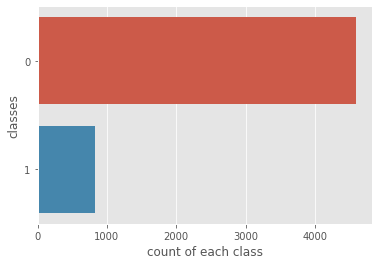

In [31]:
#Print class freq. through pandas 
print(df1.groupby('target_var').size()) #"target" is the name of the target column, change it accordingly to your dataset

#some imports to plot 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

#Visualize Class Counts
sns.countplot(y=df1.target_var ,data=df1) #"target" is the name of the target column, change it accordingly to your dataset
plt.xlabel("count of each class")
plt.ylabel("classes")
plt.show()
print()  

After Deleting all Missing valus the proportion of 0 and 1 classed still is high.

In [32]:
df1.describe(include="all")      # statitic analysis of each variable except "OBS_DATE" which will be taken more into consideration in next steps.

income   loan_amount  term_length  install_to_inc        schufa  \
count    5433.000000   5433.000000  5433.000000     5433.000000   5433.000000   
unique           NaN           NaN          NaN             NaN           NaN   
top              NaN           NaN          NaN             NaN           NaN   
freq             NaN           NaN          NaN             NaN           NaN   
mean    27239.154851  20566.611449    64.953065        0.021070   8777.185063   
std     12536.968883   7462.416674    30.679789        0.024517   2027.234105   
min      5021.691061   5100.000000    12.000000        0.000729   6000.156943   
25%     17659.796604  15100.000000    41.000000        0.007351   7208.843594   
50%     26212.892428  20300.000000    63.000000        0.012998   8377.074193   
75%     35423.159052  25600.000000    85.000000        0.025120   9849.396002   
max     77952.582315  50300.000000   193.000000        0.337249  14839.440464   

         num_applic marital   occup   target_var  
count   5433.000000    5433    5433  5433.000000  
unique          NaN       5       6          NaN  
top             NaN  Single  Worker          NaN  
freq            NaN    2230    2610          NaN  
mean       1.291920     NaN     NaN     0.153690  
std        0.454687     NaN     NaN     0.360685  
min        1.000000     NaN     NaN     0.000000  
25%        1.000000     NaN     NaN     0.000000  
50%        1.000000     NaN     NaN     0.000000  
75%        2.000000     NaN     NaN     0.000000  
max        2.000000     NaN     NaN     1.000000

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fad87d0ff10>,
      dtype=object)

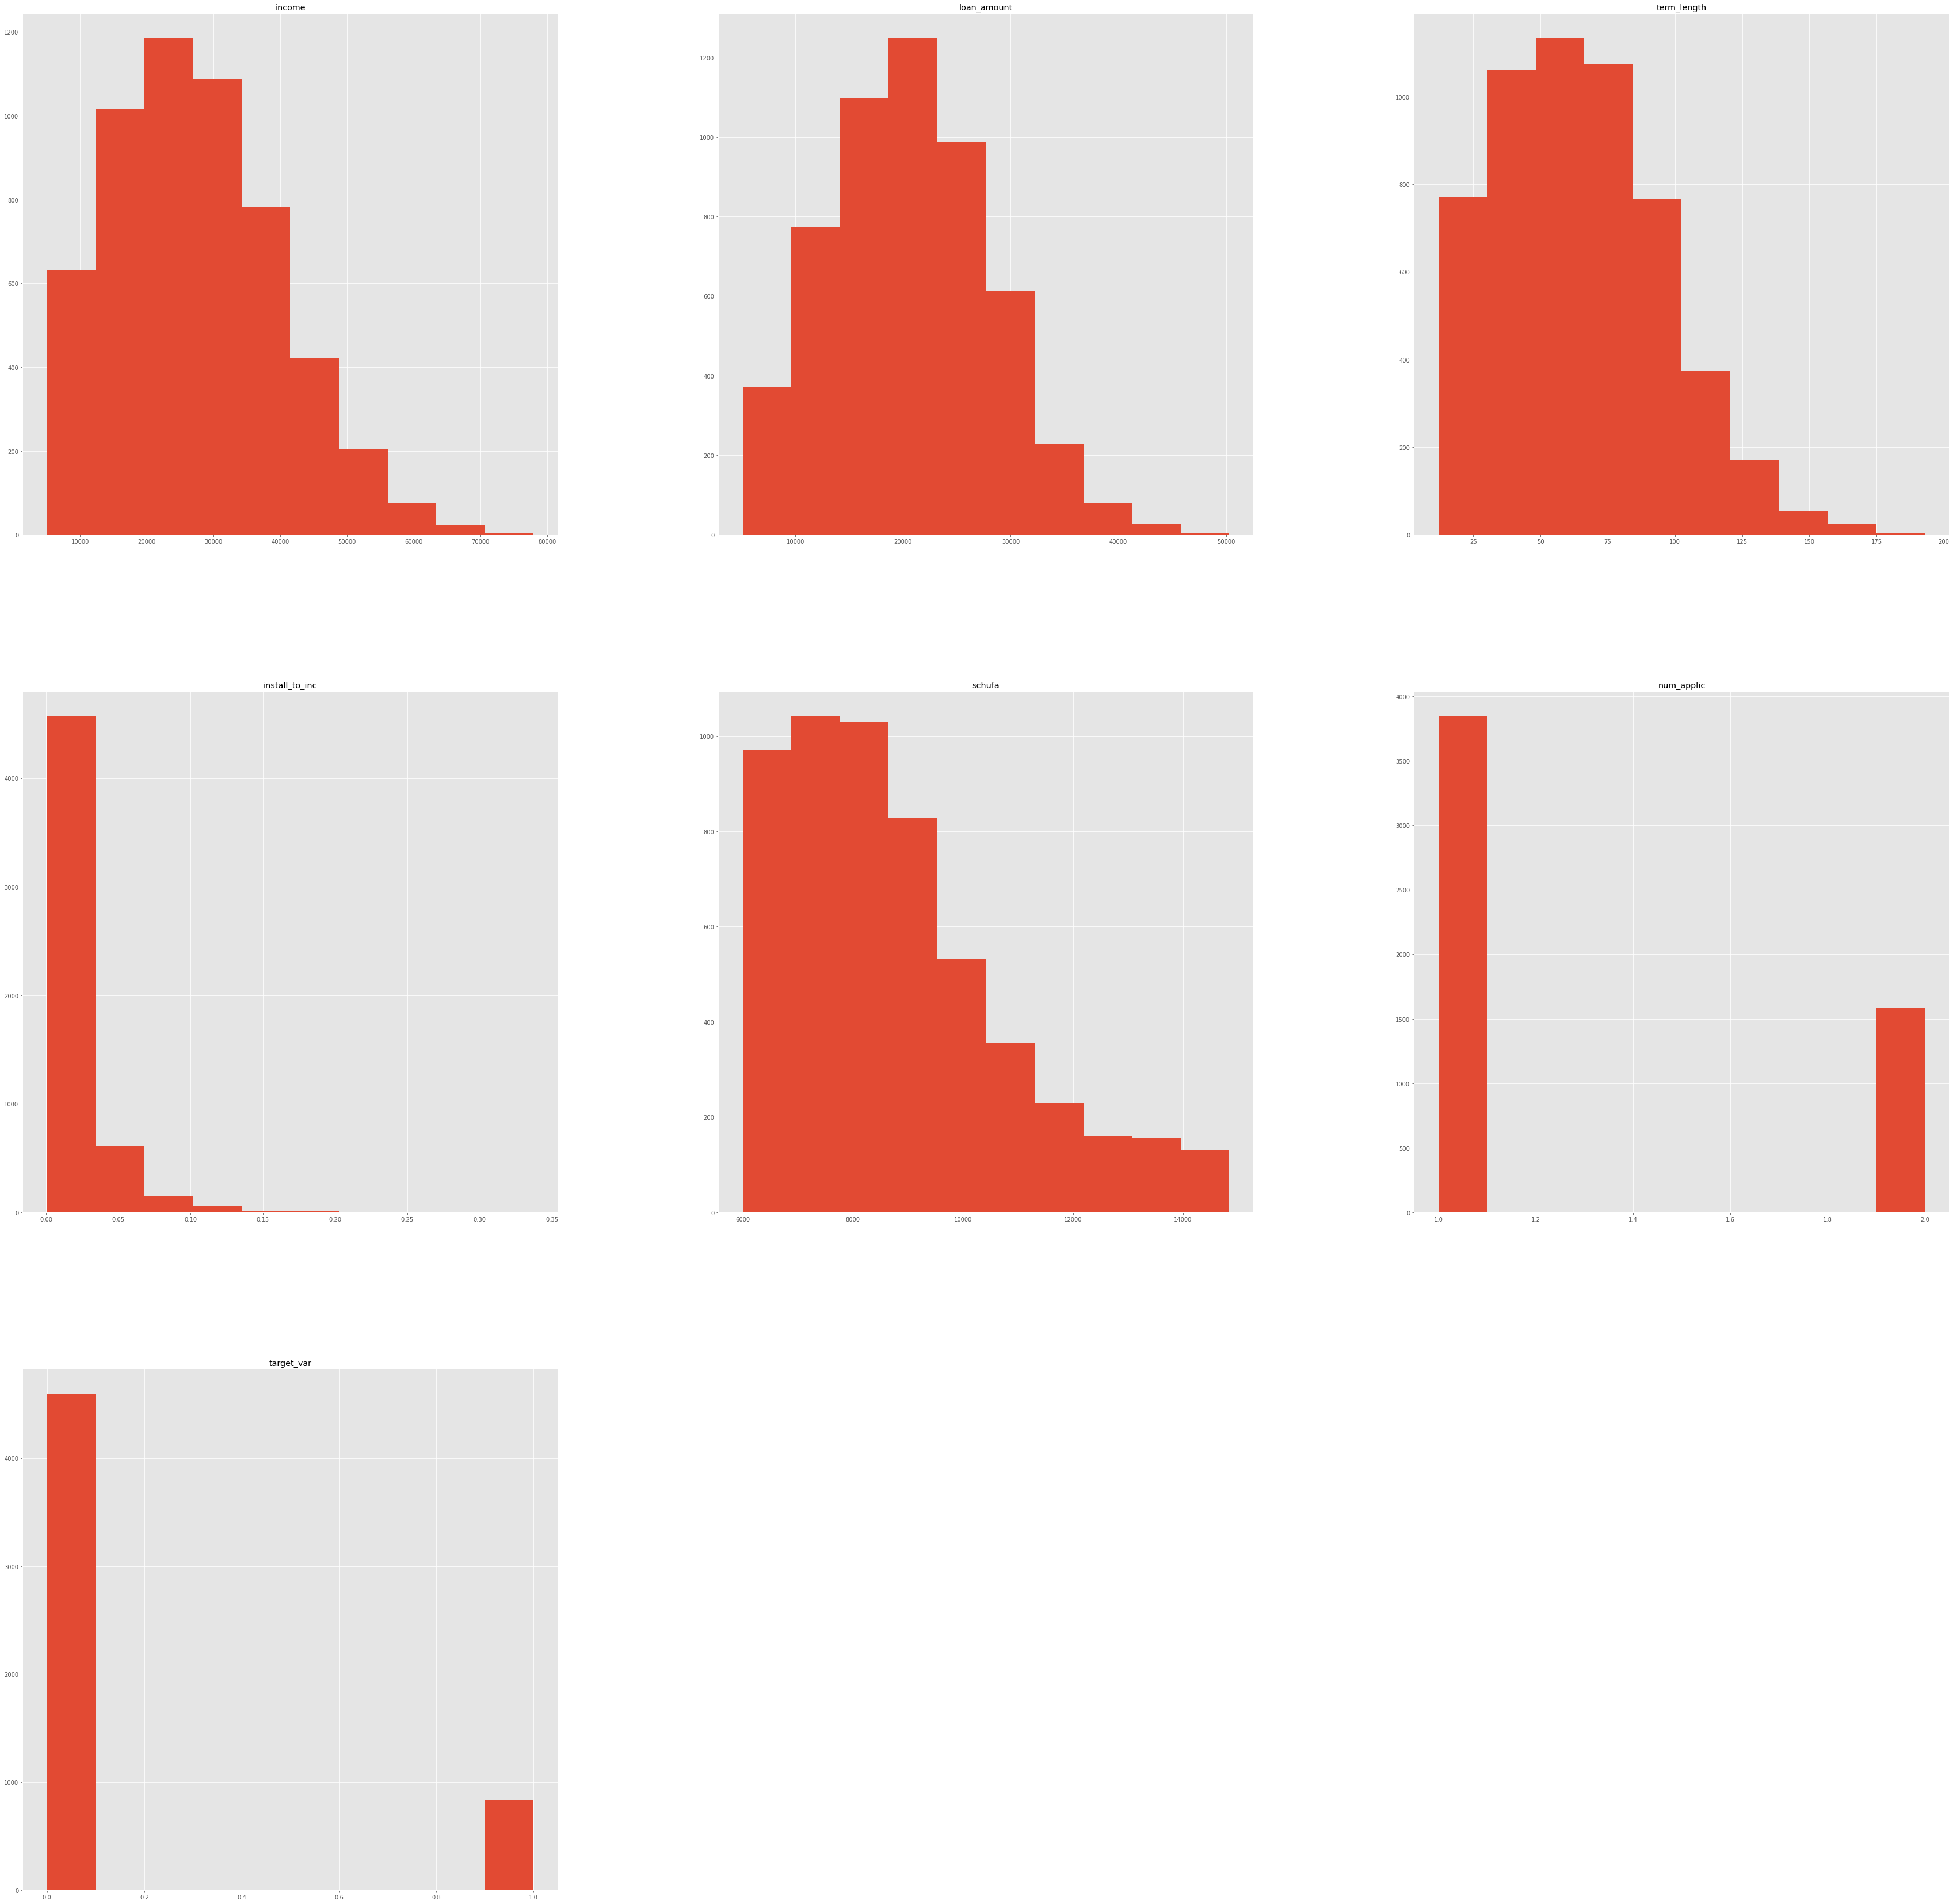

In [33]:
df1.hist(figsize = (60,60))      # Drawing histogram of each variable

In [34]:
df2 = df1.copy()

In [35]:
df2.dtypes

income            float64
loan_amount       float64
term_length       float64
install_to_inc    float64
schufa            float64
num_applic          int64
marital            object
occup              object
target_var          int64
dtype: object

In [36]:
df2 

income  loan_amount  term_length  install_to_inc        schufa  \
0     15897.753807      19900.0         59.0        0.021216   7241.656646   
1     30494.619636      28500.0         38.0        0.024595   6566.899667   
2     31606.202672      14000.0        122.0        0.003631   7075.138486   
3     39686.880944      16200.0         85.0        0.004802  10278.352721   
4      8298.012136      16100.0         42.0        0.046196   7109.577583   
...            ...          ...          ...             ...           ...   
5428   9945.386680       9200.0         70.0        0.013215   6577.789980   
5429  13159.390503      10100.0         50.0        0.015350   8689.654573   
5430  52514.911023      25500.0         54.0        0.008992   8212.031222   
5431  23743.298598      21900.0         66.0        0.013975   9703.314402   
5432  29675.270560      27600.0         35.0        0.026573   9669.092140   

      num_applic    marital     occup  target_var  
0              1  Separated    Worker           1  
1              1   Divorced    Worker           1  
2              1     Single  Employee           0  
3              2    Married  Employee           0  
4              1     Single    Worker           1  
...          ...        ...       ...         ...  
5428           2     Single    Worker           1  
5429           1     Single    Worker           1  
5430           2    Married    Worker           0  
5431           1     Single    Worker           0  
5432           1   Divorced    Worker           0  

[5433 rows x 9 columns]

In [37]:
df2 = pd.concat([df2, OBS_DATE], axis = 1)

##**3.3)      Data Visualization**

Deviding the Dataset into categorical and Numerical Variables

In [38]:
df2_num = df2[["income", "loan_amount", "term_length", "install_to_inc", "schufa", "num_applic", "target_var" ]]
df2_cat = df2[["occup","marital", "OBS_DATE"]]

###**3.3.1) Categorical Features**

In [39]:
OBS_DATE = df2_cat["OBS_DATE"]
target_var = df2_num["target_var"]

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


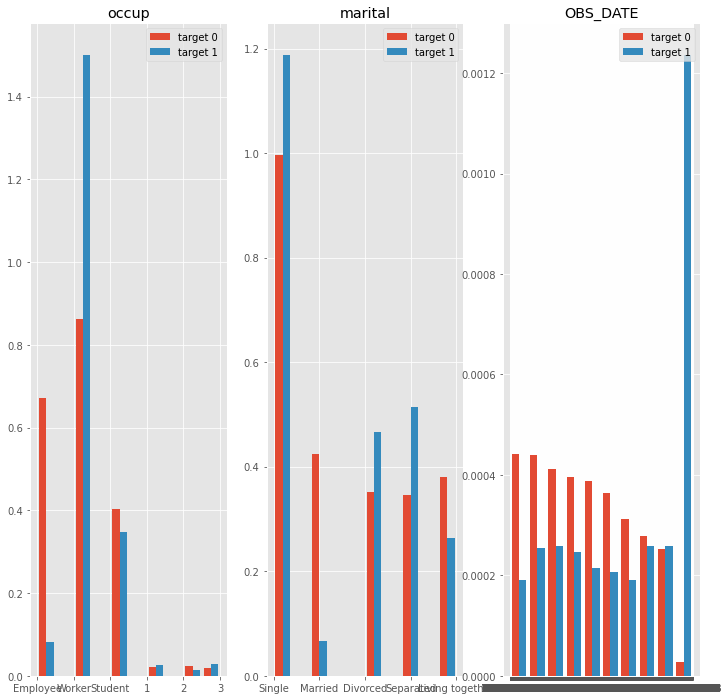

In [40]:
df_0=df2_cat[df2['target_var']==0] # records wih target_var==0
df_1=df2_cat[df2['target_var']==1] # records wih target_var==1


fig, axes = plt.subplots(1, 3,figsize=[12,12])
axes = axes.flatten()
i=0
for x in df2_cat.columns:
    plt.sca(axes[i]) # set the current Axes
    plt.hist([df_0[x],df_1[x]], density=True, label = ["target 0", "target 1"])
    plt.title(x)
    # labels= ["target 0","target 1 "]
    # plt.legend(labels)
    plt.legend(["target 0", "target 1"], loc ="upper right")
    i+=1
plt.show()


####**Analysing the distribution of variable**

In [41]:
df2_cat_1 = df2_cat.copy()
df2_cat_1 = df2_cat_1.drop(columns = ["occup", "marital"])
df2_cat_1['OBS_DATE'] = pd.to_datetime(df2_cat_1['OBS_DATE'])


In [42]:
df2_cat1_0=df2_cat_1[df2['target_var']==0] # records wih target_var==0
df2_cat1_1=df2_cat_1[df2['target_var']==1] # records wih target_var==1

In [43]:
df2_cat1_0.head()

OBS_DATE
2 2015-02-19
3 2010-11-09
5 2015-10-16
6 2012-01-02
7 2011-06-30

In [44]:
df2_cat1_1.head()

OBS_DATE
0  2015-07-13
1  2016-01-25
4  2018-04-07
10 2009-10-14
24 2016-08-10

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


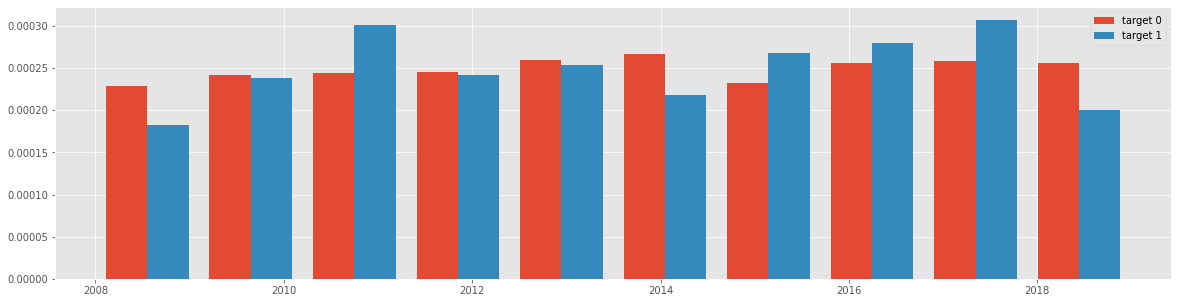

In [45]:
fig, ax = plt.subplots(figsize=(20, 5))
plt.hist([df2_cat1_0["OBS_DATE"],df2_cat1_1["OBS_DATE"]], density=True, label = ["target 0", "target 1"])
plt.legend(["target 0", "target 1"], loc ="upper right")
plt.show()

 Diagram above shows quit the same distribution of the target over the train years(2008-2016) and test_years(2016-2018).


---

Applying **One-Hot-Encoding** to the marital and occup fearures. OBS_DATE feature will be used later for indexing and sorting the date.

In [46]:
dummies = pd.get_dummies(df2_cat[['marital', "occup"]],drop_first=False) 
dummies.head()

marital_Divorced  marital_Living together  marital_Married  \
0                 0                        0                0   
1                 1                        0                0   
2                 0                        0                0   
3                 0                        0                1   
4                 0                        0                0   

   marital_Separated  marital_Single  occup_1  occup_2  occup_3  \
0                  1               0        0        0        0   
1                  0               0        0        0        0   
2                  0               1        0        0        0   
3                  0               0        0        0        0   
4                  0               1        0        0        0   

   occup_Employee  occup_Student  occup_Worker  
0               0              0             1  
1               0              0             1  
2               1              0             0  
3               1              0             0  
4               0              0             1

###**3.3.2) Numerical Features**





array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fad84278950>,
      dtype=object)

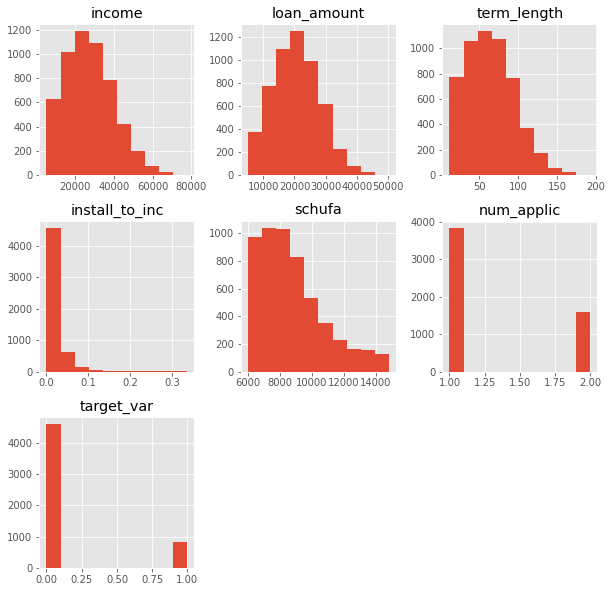

In [47]:
df2_num.hist(figsize= (10,10))     #histogram of the numerical features

Our original continuous data do not follow the bell curve, we can apply **logaritmic** or **gamma** transformion to this data to make them as **“normal”** as possible so that the statistical analysis results from this data become more valid . Dependeing on the distribution shape of the variables, different transformation can be applied to them.

The log and gamma transformation reduces or removes the **skewness** of our original data.

Gamma Transformation has one constant called **lambda**, showing the skewness intensity of the distribution. There is a special library for the gamma transformation called **boxcox**, which is used in cell below.

In the histogram table above, **install_to_inc** variable distribution has **logarithmic behaviour with positive Skewness(left-directed tail)**,  and **Schufa, income, loan_amount, term_length**  have **gamma distribution with  positive Skewness(left-directed tail)**, enabling us apply logarithmic and gamma transformation equivalently.

In [48]:
pd.options.mode.chained_assignment = None


# Log Transformation

df2_num['log_install_to_inc'] = df2_num["install_to_inc"].apply(math.log)





#  Box-Cox Transformation

schufa_orig= df2_num["schufa"]
schufa_trans, lmbda = stats.boxcox(schufa_orig)

income_orig = df2_num["income"]
income_trans, lmbda = stats.boxcox(income_orig)

loan_amount_orig = df2_num["loan_amount"]
loan_amount_trans, lmbda = stats.boxcox(loan_amount_orig)

term_length_orig= df2_num["term_length"]
term_length_trans, lmbda = stats.boxcox(term_length_orig)

Best lambda parameter = 0.5


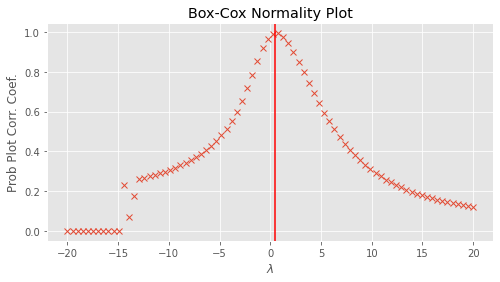

In [49]:
print('Best lambda parameter = %s' % round(lmbda, 3))

fig, ax = plt.subplots(figsize=(8, 4))
prob = stats.boxcox_normplot(term_length_orig, -20, 20, plot=ax)
ax.axvline(lmbda, color='r');

In [50]:
term_length_trans.sort()
mean, std = stats.norm.fit(term_length_trans, loc=0)
pdf_norm = stats.norm.pdf(term_length_trans, mean, std)

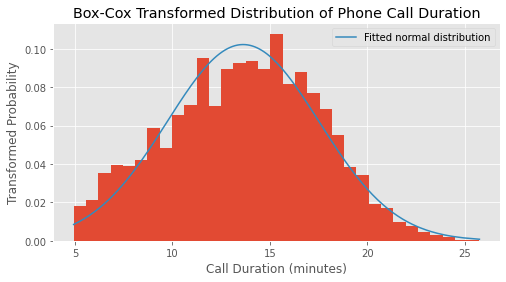

In [51]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.hist(term_length_trans, bins='auto', density=True)
ax.plot(term_length_trans, pdf_norm, label='Fitted normal distribution')
ax.set_xlabel('Call Duration (minutes)')
ax.set_ylabel('Transformed Probability')
ax.set_title('Box-Cox Transformed Distribution of Phone Call Duration')
ax.legend();

In [52]:
df2_num["term_length_new"] = term_length_trans
df2_num["income_trans_new"] = income_trans
df2_num["loan_amount_new"] = loan_amount_trans
df2_num["schufa_new"] = schufa_trans

In [53]:
df2_num = df2_num.drop(columns = ['income', 'loan_amount', 'install_to_inc', 'term_length', 'schufa'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fad808d0c10>,
      dtype=object)

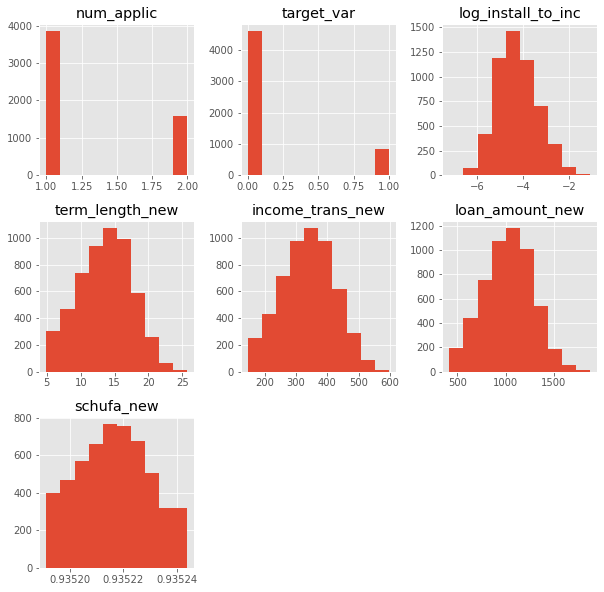

In [54]:
df2_num.hist(figsize = ( 10,10))

Transformed distribution shown above are close to normal distribution and **do not show any outlier**. Therefore anamaly detection is not applied in this case. To be mentioned that these features are in correlated with target, meaning that high values of the features help to have a more rigid estimation of the target values.

---



In [55]:
df2_num

num_applic  target_var  log_install_to_inc  term_length_new  \
0              1           1           -3.852996         4.925878   
1              1           1           -3.705232         4.925878   
2              1           0           -5.618317         4.925878   
3              2           0           -5.338661         4.925878   
4              1           1           -3.074866         4.925878   
...          ...         ...                 ...              ...   
5428           2           1           -4.326401        24.278427   
5429           1           1           -4.176623        24.429800   
5430           2           0           -4.711403        24.952904   
5431           1           0           -4.270468        24.952904   
5432           1           0           -3.627846        25.754989   

      income_trans_new  loan_amount_new  schufa_new  
0           265.143031      1020.553714    0.935207  
1           369.784983      1292.928189    0.935199  
2           376.601367       809.494155    0.935205  
3           422.967785       891.211296    0.935228  
4           190.073705       887.582842    0.935205  
...                ...              ...         ...  
5428        208.559401       613.792127    0.935199  
5429        240.707983       652.748670    0.935219  
5430        487.869549      1201.610188    0.935215  
5431        325.447594      1087.005033    0.935225  
5432        364.681927      1265.894049    0.935225  

[5433 rows x 7 columns]

In [56]:
columns = list(df2_num.columns.values)     # making list of the features' names

In [57]:
columns

['num_applic',
 'target_var',
 'log_install_to_inc',
 'term_length_new',
 'income_trans_new',
 'loan_amount_new',
 'schufa_new']

In [58]:
columns.remove("target_var")     # removing the target feature from columns list
columns = np.array(columns)

In [59]:
df2_num = df2_num[["income_trans_new", "loan_amount_new", "schufa_new", "term_length_new", "log_install_to_inc","num_applic", "target_var"]]   # changing the locations of the features in dataframe

In [60]:
df2_num

income_trans_new  loan_amount_new  schufa_new  term_length_new  \
0           265.143031      1020.553714    0.935207         4.925878   
1           369.784983      1292.928189    0.935199         4.925878   
2           376.601367       809.494155    0.935205         4.925878   
3           422.967785       891.211296    0.935228         4.925878   
4           190.073705       887.582842    0.935205         4.925878   
...                ...              ...         ...              ...   
5428        208.559401       613.792127    0.935199        24.278427   
5429        240.707983       652.748670    0.935219        24.429800   
5430        487.869549      1201.610188    0.935215        24.952904   
5431        325.447594      1087.005033    0.935225        24.952904   
5432        364.681927      1265.894049    0.935225        25.754989   

      log_install_to_inc  num_applic  target_var  
0              -3.852996           1           1  
1              -3.705232           1           1  
2              -5.618317           1           0  
3              -5.338661           2           0  
4              -3.074866           1           1  
...                  ...         ...         ...  
5428           -4.326401           2           1  
5429           -4.176623           1           1  
5430           -4.711403           2           0  
5431           -4.270468           1           0  
5432           -3.627846           1           0  

[5433 rows x 7 columns]



#### **Univariate Distribution**


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

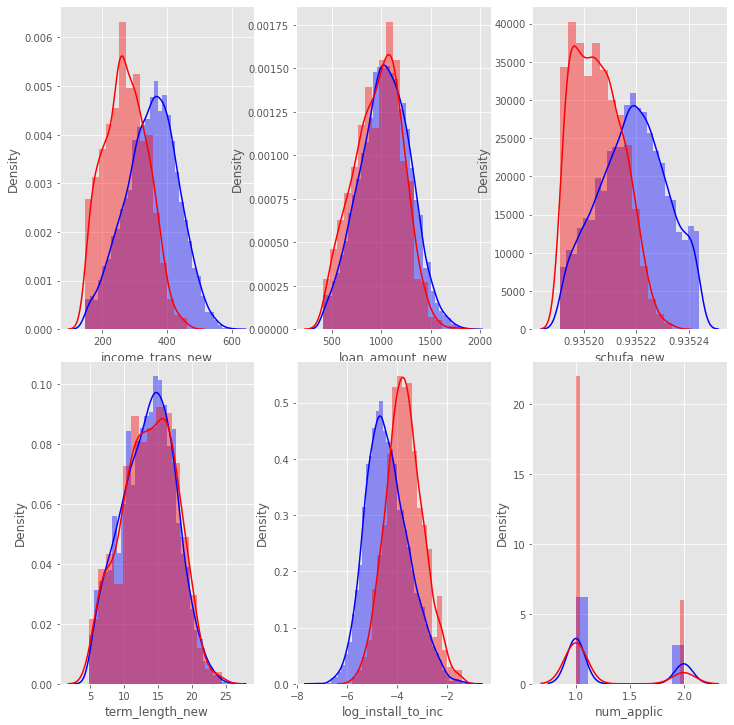

In [61]:
X0 = df2_num[df2_num['target_var']==0]
X1 = df2_num[df2_num['target_var']==1]

fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(10,10))
fig.tight_layout()

for i, ax in zip(range(columns.size), axes.flat):
    sns.distplot(X0.iloc[:,i], color="blue", ax=ax)
    sns.distplot(X1.iloc[:,i], color="red", ax=ax)
plt.show()

As can be seen above: schufa new, log_install_to_inc and income_trans_new have two different diagrams of 0 and 1 classes, meaning that these features are more representative and important to be used in model. more features' targets are separatable, more inforrmative and useful it is for the modeling process. On the contrary, num_applic, term_length and new amount have target diagrams of 0 and 1 which are completely overlapped, explaining that doing classification using these features will not be useful very much. However, in the feature Selection part, this concept will be more investigated and also will be shown that schufa_new, log_install_to_inc and income_trans_new are sequentially most important features as previously was discussed.

In [62]:
pd.DataFrame(df2_num.income_trans_new).describe()

income_trans_new
count       5433.000000
mean         339.197695
std           83.945047
min          146.864900
25%          279.778641
50%          342.309136
75%          399.151519
max          596.596097

In [63]:
df2_num.head()

income_trans_new  loan_amount_new  schufa_new  term_length_new  \
0        265.143031      1020.553714    0.935207         4.925878   
1        369.784983      1292.928189    0.935199         4.925878   
2        376.601367       809.494155    0.935205         4.925878   
3        422.967785       891.211296    0.935228         4.925878   
4        190.073705       887.582842    0.935205         4.925878   

   log_install_to_inc  num_applic  target_var  
0           -3.852996           1           1  
1           -3.705232           1           1  
2           -5.618317           1           0  
3           -5.338661           2           0  
4           -3.074866           1           1

####**Bivariate Distribution**


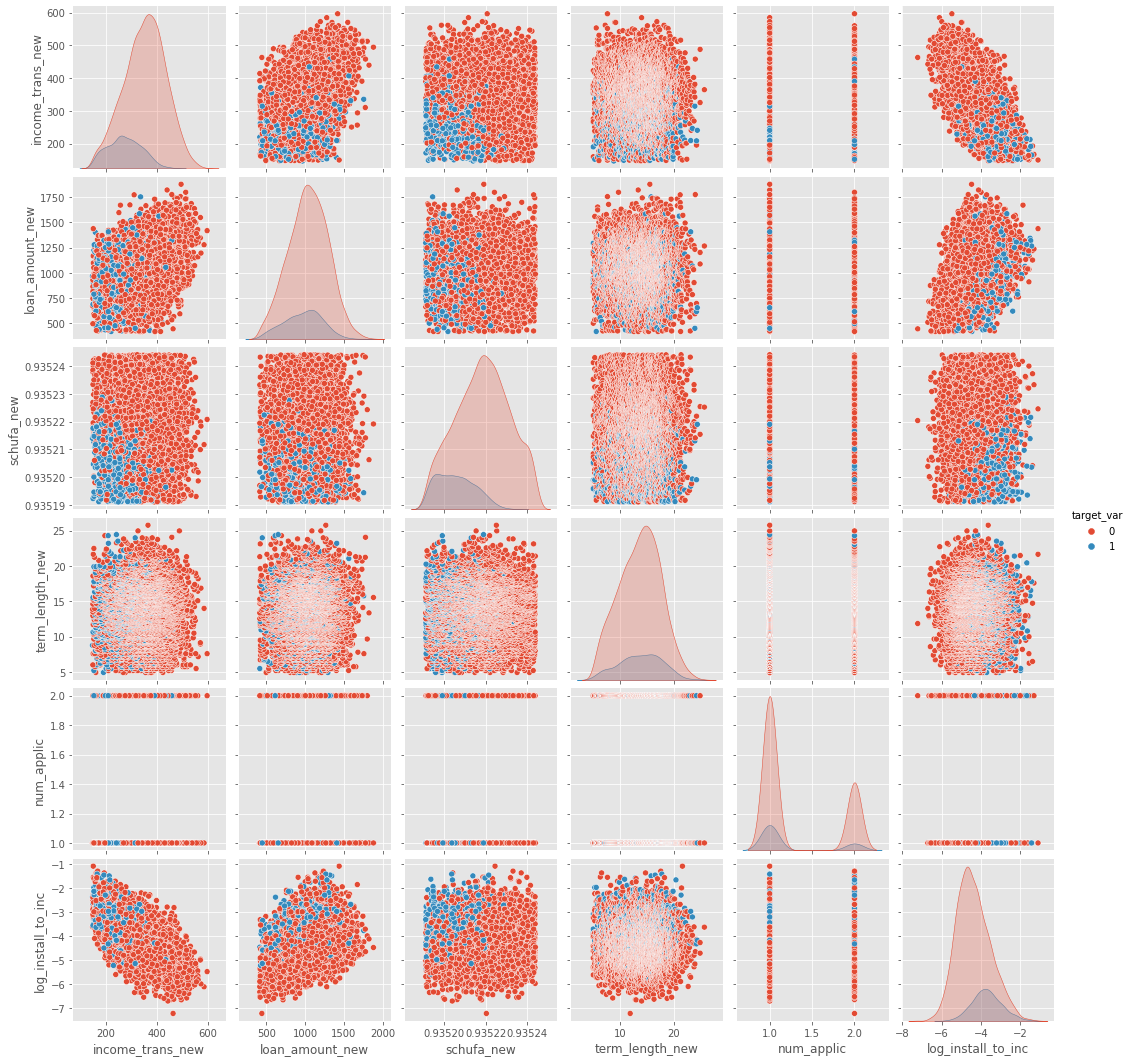

In [64]:
sns.pairplot(df2_num[['income_trans_new',"loan_amount_new","schufa_new","term_length_new","num_applic" ,"log_install_to_inc", 'target_var']], hue='target_var')

####**Numerical Variables Correlation**

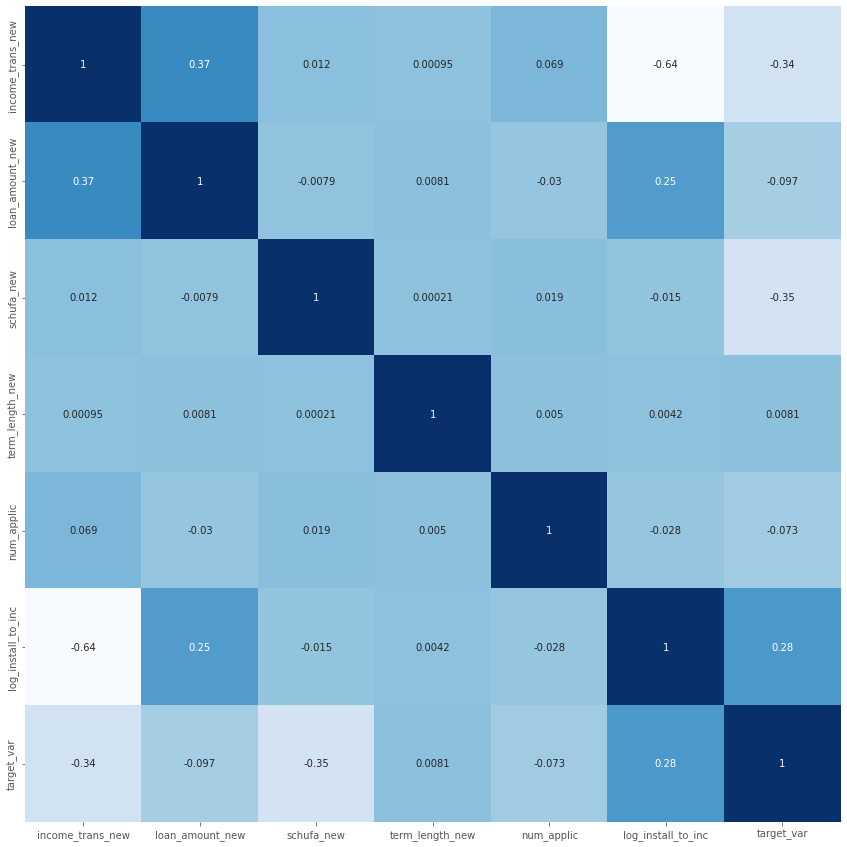

In [65]:
cormat=df2_num[['income_trans_new',"loan_amount_new","schufa_new","term_length_new","num_applic" ,"log_install_to_inc", "target_var"]].corr(method='pearson')
plt.figure(figsize = (15,15))
sns.heatmap(cormat,square=True,annot=True,cmap="Blues",cbar=False,xticklabels=True, yticklabels=True, vmax = 0.9)

 Numerical Independent Features are not correlated with eachother. Mamimum Correlation between nunerical features is 0.35, meaning that they are internally independent. So, it is not allowed to remove any of the feature. To be also mentioned that schufa and income features have the highest correlation(negative correlation) with the target. This is also a confirmation of what previously was discussed about feature importance and predictive capability.
    



####**Normalizing the Numerical Features**

In [66]:
scaler = StandardScaler().fit(df2_num)
scaled_df = pd.DataFrame(scaler.transform(df2_num))
scaled_df.columns = df2_num.columns

scaled_df.head()

income_trans_new  loan_amount_new  schufa_new  term_length_new  \
0         -0.882261        -0.024164   -0.749716         -2.22995   
1          0.364406         1.053509   -1.331593         -2.22995   
2          0.445614        -0.859238   -0.882647         -2.22995   
3          0.998008        -0.535918    0.898756         -2.22995   
4         -1.776611        -0.550274   -0.854626         -2.22995   

   log_install_to_inc  num_applic  target_var  
0            0.481435   -0.642082    2.346612  
1            0.648687   -0.642082    2.346612  
2           -1.516714   -0.642082   -0.426146  
3           -1.200174    1.557433   -0.426146  
4            1.362192   -0.642082    2.346612

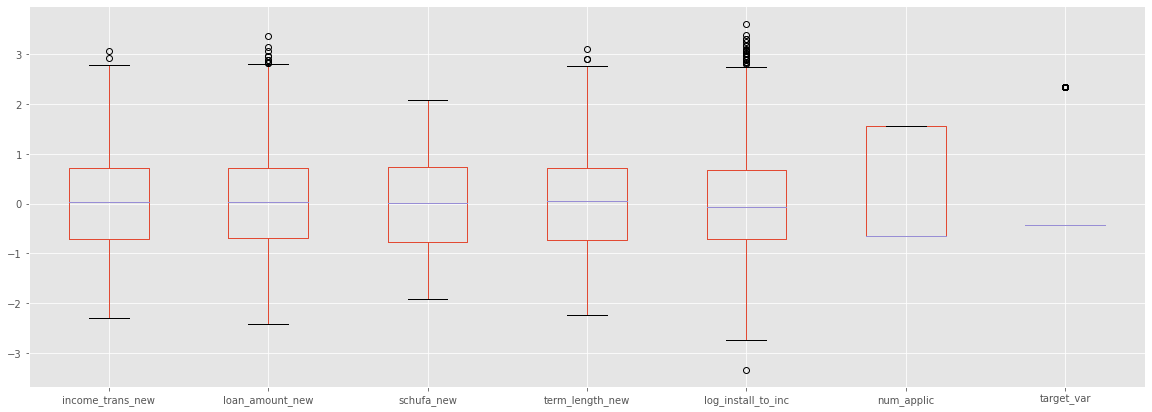

In [67]:
scaled_df.boxplot(figsize = (20,7))

###**3.3.3) Data Aggregation**

Concatinating one-hot-encoded Categorical Features (dummies) and Numerical features.

In [68]:
X_numerical= scaled_df.drop(columns = 'target_var')


In [69]:
X_numerical["target_var"] = df2_num["target_var"]

In [70]:
X_numerical

income_trans_new  loan_amount_new  schufa_new  term_length_new  \
0            -0.882261        -0.024164   -0.749716        -2.229950   
1             0.364406         1.053509   -1.331593        -2.229950   
2             0.445614        -0.859238   -0.882647        -2.229950   
3             0.998008        -0.535918    0.898756        -2.229950   
4            -1.776611        -0.550274   -0.854626        -2.229950   
...                ...              ...         ...              ...   
5428         -1.556379        -1.633550   -1.321220         2.730286   
5429         -1.173372        -1.479415    0.184960         2.769084   
5430          1.771225         0.692201   -0.085684         2.903160   
5431         -0.163814         0.238757    0.668299         2.903160   
5432          0.303610         0.946546    0.653689         3.108742   

      log_install_to_inc  num_applic  target_var  
0               0.481435   -0.642082           1  
1               0.648687   -0.642082           1  
2              -1.516714   -0.642082           0  
3              -1.200174    1.557433           0  
4               1.362192   -0.642082           1  
...                  ...         ...         ...  
5428           -0.054407    1.557433           1  
5429            0.115125   -0.642082           1  
5430           -0.490187    1.557433           0  
5431            0.008902   -0.642082           0  
5432            0.736280   -0.642082           0  

[5433 rows x 7 columns]

In [71]:
OBS_DATE = pd.DataFrame(OBS_DATE)
OBS_DATE=OBS_DATE.reset_index()
dummies = dummies.reset_index()

In [72]:
print(dummies.shape)
print(X_numerical.shape)
print(OBS_DATE.shape)

(5433, 12)
(5433, 7)
(5433, 2)


In [73]:
OBS_DATE = OBS_DATE.drop(columns = ["index"])
dummies = dummies.drop(columns = ["index"])
OBS_DATE


OBS_DATE
0     13-07-2015
1     25-01-2016
2     19-02-2015
3     11-09-2010
4     04-07-2018
...          ...
5428  22-03-2014
5429  02-12-2016
5430  02-01-2010
5431  23-11-2016
5432  19-12-2010

[5433 rows x 1 columns]

In [74]:
 X = pd.concat([X_numerical, dummies, OBS_DATE ], axis = 1)   # X is the aggregated daraframe 
 X.head()

income_trans_new  loan_amount_new  schufa_new  term_length_new  \
0         -0.882261        -0.024164   -0.749716         -2.22995   
1          0.364406         1.053509   -1.331593         -2.22995   
2          0.445614        -0.859238   -0.882647         -2.22995   
3          0.998008        -0.535918    0.898756         -2.22995   
4         -1.776611        -0.550274   -0.854626         -2.22995   

   log_install_to_inc  num_applic  target_var  marital_Divorced  \
0            0.481435   -0.642082           1                 0   
1            0.648687   -0.642082           1                 1   
2           -1.516714   -0.642082           0                 0   
3           -1.200174    1.557433           0                 0   
4            1.362192   -0.642082           1                 0   

   marital_Living together  marital_Married  marital_Separated  \
0                        0                0                  1   
1                        0                0                  0   
2                        0                0                  0   
3                        0                1                  0   
4                        0                0                  0   

   marital_Single  occup_1  occup_2  occup_3  occup_Employee  occup_Student  \
0               0        0        0        0               0              0   
1               0        0        0        0               0              0   
2               1        0        0        0               1              0   
3               0        0        0        0               1              0   
4               1        0        0        0               0              0   

   occup_Worker    OBS_DATE  
0             1  13-07-2015  
1             1  25-01-2016  
2             0  19-02-2015  
3             0  11-09-2010  
4             1  04-07-2018

##**3.4) Data Sampling and Splitting**

###**3.4.1) Data Sampling**

In [75]:
X1 = X.copy()
X1["target_var"]=X_numerical['target_var']

target_var
0    4598
1     835
dtype: int64


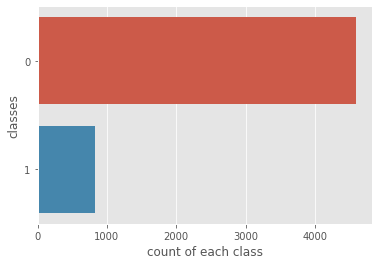

In [76]:
#Print class freq. through pandas 
print(X1.groupby('target_var').size()) #"target" is the name of the target column, change it accordingly to your dataset

#some imports to plot 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

#Visualize Class Counts
sns.countplot(y=X1.target_var ,data=X1) #"target" is the name of the target column, change it accordingly to your dataset
plt.xlabel("count of each class")
plt.ylabel("classes")
plt.show()
print()  

Due to huge discrepancy between target 0 and 1, discussed previously, I use oversampling **to increase the minority class(target 1) up to 6000.** Under_sampling method is not used, because we may lose information. **Over-Sampling** is also for preventing overfitting. **Having less data for the more complex model leads to poor performance and overfitting, especially when we are using models like ANN(Deep Learning).**

In [77]:
from sklearn.utils import resample

#Over-sample Minority Class
#1) Separate majority and minority classes
df_majority = X[X["target_var"]==0] #"target" is the name of the target column, change it accordingly to your dataset
df_minority = X[X["target_var"]==1] #"target" is the name of the target column, change it accordingly to your dataset
 
#2) Oversample minority class
df_minority_oversampled = resample(df_minority, 
                                   replace=True,
                                   n_samples=6000,     # number of samples into the minority class (change it accordingly to your dataset)
                                   random_state=123)  # reproducible results
 
#3) Combine oversampled minority class with majority class
df_oversampled = pd.concat([df_minority_oversampled, df_majority])
 
#4) Display new class counts
df_oversampled["target_var"].value_counts() #"target" is the name of the target column, change it accordingly to your dataset

1    6000
0    4598
Name: target_var, dtype: int64

In [78]:
df_oversampled.head()

income_trans_new  loan_amount_new  schufa_new  term_length_new  \
3452         -0.818283        -0.324076   -1.245814         0.401060   
2371         -1.489747         0.238757   -1.133971        -0.137755   
2483          0.118879         0.704472   -0.992825        -0.070528   
2075         -0.107483        -0.829160   -0.628814        -0.275845   
611          -0.740602         0.455830   -0.129236        -1.342888   

      log_install_to_inc  num_applic  target_var  marital_Divorced  \
3452            0.832595   -0.642082           1                 0   
2371            1.249632   -0.642082           1                 0   
2483            0.715625   -0.642082           1                 0   
2075            0.305934   -0.642082           1                 1   
611             0.677547    1.557433           1                 1   

      marital_Living together  marital_Married  marital_Separated  \
3452                        0                0                  1   
2371                        0                0                  0   
2483                        0                0                  0   
2075                        0                0                  0   
611                         0                0                  0   

      marital_Single  occup_1  occup_2  occup_3  occup_Employee  \
3452               0        0        0        0               0   
2371               1        0        0        0               0   
2483               1        0        0        0               0   
2075               0        0        0        0               0   
611                0        0        0        0               0   

      occup_Student  occup_Worker    OBS_DATE  
3452              0             1  12-12-2016  
2371              1             0  29-09-2011  
2483              0             1  05-05-2011  
2075              0             1  19-10-2009  
611               0             1  23-12-2010

In [79]:
df_oversampled = df_oversampled.reset_index()
df_oversampled =df_oversampled.drop(columns = ["index"])

### **3.4.2) Data Splitting**

In order to split the data based on the date, data should be sorted based on their date.

In [80]:
df_scaled = df_oversampled

In [81]:
import pandas as pd
df_scaled['OBS_DATE'] = pd.to_datetime(df_scaled['OBS_DATE'])
df_scaled = df_scaled.set_index(df_scaled['OBS_DATE'])
df_scaled = df_scaled.sort_index()
df_scaled =df_scaled.drop(columns = ['OBS_DATE'])

In [82]:
df_scaled

income_trans_new  loan_amount_new  schufa_new  term_length_new  \
OBS_DATE                                                                     
2008-01-02         -0.730429        -0.408045    0.278537        -1.657103   
2008-01-02         -0.783476        -0.739783    0.783192        -0.311176   
2008-01-02          0.064665         0.277472    1.262249         0.156210   
2008-01-03          0.360769         0.994230    1.936597         1.013105   
2008-01-07          0.514060         1.402004   -0.973914        -1.152595   
...                      ...              ...         ...              ...   
2018-12-28         -0.939456        -0.784314    0.142556        -2.087786   
2018-12-29          0.468754         0.225811    0.235114         0.986914   
2018-12-30          0.573176         1.379135    0.069015         0.907505   
2018-12-30         -0.018198         0.789910    0.359164         0.960586   
2018-12-30          2.157777         1.171010   -0.878771        -0.171810   

            log_install_to_inc  num_applic  target_var  marital_Divorced  \
OBS_DATE                                                                   
2008-01-02            0.061914    1.557433           0                 0   
2008-01-02           -0.424735   -0.642082           0                 0   
2008-01-02            0.867884    1.557433           0                 0   
2008-01-03            0.342721   -0.642082           0                 0   
2008-01-07            1.161786   -0.642082           0                 0   
...                        ...         ...         ...               ...   
2018-12-28            0.470164    1.557433           0                 0   
2018-12-29           -0.695041    1.557433           0                 0   
2018-12-30           -0.190595   -0.642082           0                 0   
2018-12-30            1.543834   -0.642082           0                 0   
2018-12-30           -1.131285   -0.642082           0                 0   

            marital_Living together  marital_Married  marital_Separated  \
OBS_DATE                                                                  
2008-01-02                        0                0                  0   
2008-01-02                        0                0                  0   
2008-01-02                        0                0                  0   
2008-01-03                        1                0                  0   
2008-01-07                        0                0                  0   
...                             ...              ...                ...   
2018-12-28                        0                1                  0   
2018-12-29                        0                0                  0   
2018-12-30                        0                0                  0   
2018-12-30                        0                0                  1   
2018-12-30                        1                0                  0   

            marital_Single  occup_1  occup_2  occup_3  occup_Employee  \
OBS_DATE                                                                
2008-01-02               1        0        0        0               0   
2008-01-02               1        0        0        0               1   
2008-01-02               1        0        0        0               0   
2008-01-03               0        0        0        0               0   
2008-01-07               1        0        0        0               0   
...                    ...      ...      ...      ...             ...   
2018-12-28               0        0        0        0               0   
2018-12-29               1        0        0        0               1   
2018-12-30               1        1        0        0               0   
2018-12-30               0        0        0        0               0   
2018-12-30               0        0        0        0               1   

            occup_Student  occup_Worker  
OBS_DATE                                

Having DataFrame sorted(shown above) from 2008-01-02 to 2018-12-30, we are able to split them using this new column.

In [83]:
train = df_scaled['2008-01-01':'2016-01-01']
test  = df_scaled['2016-01-01':]

In [84]:
train

income_trans_new  loan_amount_new  schufa_new  term_length_new  \
OBS_DATE                                                                     
2008-01-02         -0.730429        -0.408045    0.278537        -1.657103   
2008-01-02         -0.783476        -0.739783    0.783192        -0.311176   
2008-01-02          0.064665         0.277472    1.262249         0.156210   
2008-01-03          0.360769         0.994230    1.936597         1.013105   
2008-01-07          0.514060         1.402004   -0.973914        -1.152595   
...                      ...              ...         ...              ...   
2015-12-29         -1.099668        -0.310176    0.902143         1.142054   
2015-12-29          0.778120         1.077120   -0.902922         1.856416   
2015-12-29         -0.434536        -0.507296    0.599916         1.605068   
2015-12-30         -0.342565        -0.622519   -1.060166         1.142054   
2015-12-31          0.161843        -1.184553   -0.293636        -1.106976   

            log_install_to_inc  num_applic  target_var  marital_Divorced  \
OBS_DATE                                                                   
2008-01-02            0.061914    1.557433           0                 0   
2008-01-02           -0.424735   -0.642082           0                 0   
2008-01-02            0.867884    1.557433           0                 0   
2008-01-03            0.342721   -0.642082           0                 0   
2008-01-07            1.161786   -0.642082           0                 0   
...                        ...         ...         ...               ...   
2015-12-29            0.532384   -0.642082           0                 1   
2015-12-29            1.303189   -0.642082           0                 0   
2015-12-29            1.445945   -0.642082           0                 0   
2015-12-30           -0.270429    1.557433           0                 0   
2015-12-31            0.610313   -0.642082           0                 0   

            marital_Living together  marital_Married  marital_Separated  \
OBS_DATE                                                                  
2008-01-02                        0                0                  0   
2008-01-02                        0                0                  0   
2008-01-02                        0                0                  0   
2008-01-03                        1                0                  0   
2008-01-07                        0                0                  0   
...                             ...              ...                ...   
2015-12-29                        0                0                  0   
2015-12-29                        0                0                  0   
2015-12-29                        0                0                  0   
2015-12-30                        0                0                  0   
2015-12-31                        0                1                  0   

            marital_Single  occup_1  occup_2  occup_3  occup_Employee  \
OBS_DATE                                                                
2008-01-02               1        0        0        0               0   
2008-01-02               1        0        0        0               1   
2008-01-02               1        0        0        0               0   
2008-01-03               0        0        0        0               0   
2008-01-07               1        0        0        0               0   
...                    ...      ...      ...      ...             ...   
2015-12-29               0        0        0        0               0   
2015-12-29               1        0        0        0               0   
2015-12-29               1        0        0        0               0   
2015-12-30               1        0        0        0               0   
2015-12-31               0        0        0        0               0   

            occup_Student  occup_Worker  
OBS_DATE                                

####**Target Balance Checking over date for Training dataset**

In [85]:
train_0=train[train['target_var']==0] # records wih target_var==0
train_1=train[train['target_var']==1] # records wih target_var==1
train_0 =train_0.reset_index()
train_1 =train_1.reset_index()

In [86]:
train_0 = train_0["OBS_DATE"]
train_1 = train_1["OBS_DATE"]
train_0 = pd.DataFrame(train_0)
train_1 = pd.DataFrame(train_1)

In [87]:
train_1

OBS_DATE
0    2008-01-16
1    2008-01-16
2    2008-01-16
3    2008-01-16
4    2008-01-16
...         ...
4244 2015-12-10
4245 2015-12-14
4246 2015-12-14
4247 2015-12-14
4248 2015-12-14

[4249 rows x 1 columns]

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


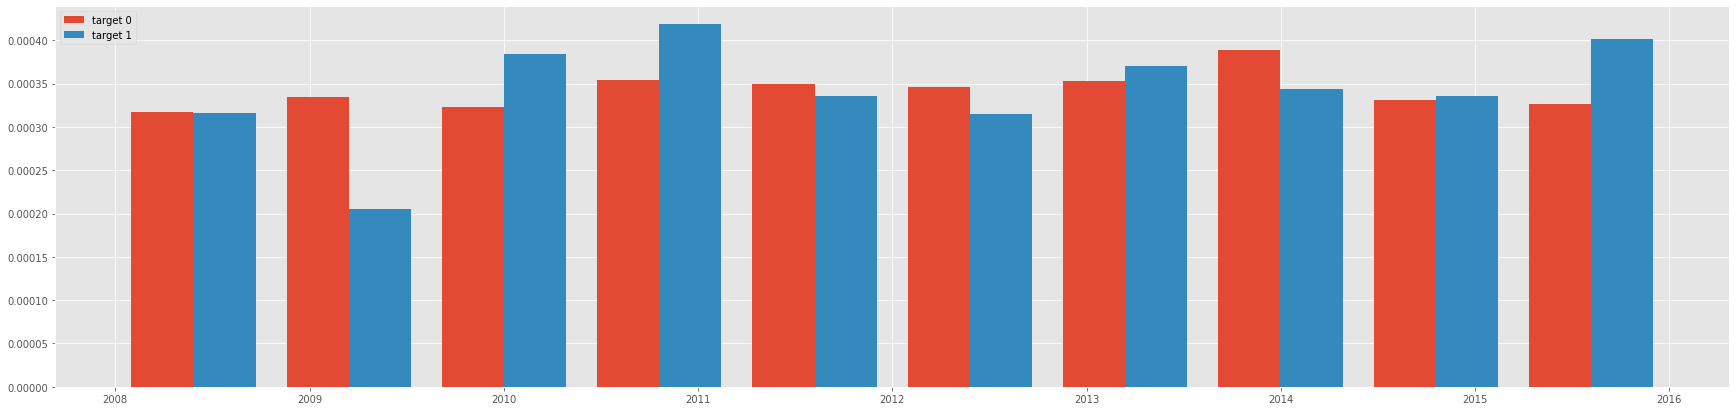

In [88]:
fig, ax = plt.subplots(figsize=(30, 7))
plt.hist([train_0["OBS_DATE"],train_1["OBS_DATE"]], density=True, label = ["target 0", "target 1"])
plt.legend(["target 0", "target 1"], loc ="upper left")
plt.show()

As can be seen in above picture, the distributions of target 0 and 1 are approximately the same over the years, justifying that models used in next steps, do not have bias behaviour toward the majority class. In other words,  **future model will not use the majority voting approach.**

####**Target Balance Checking over date for Training dataset**

In [89]:
test.head()

income_trans_new  loan_amount_new  schufa_new  term_length_new  \
OBS_DATE                                                                     
2016-01-03          0.288091         0.002523    1.981897        -0.931269   
2016-01-04          0.497088         1.124175   -1.255965        -1.892417   
2016-01-05         -0.965920        -0.282457   -1.738758         0.156210   
2016-01-05         -0.965920        -0.282457   -1.738758         0.156210   
2016-01-05         -0.965920        -0.282457   -1.738758         0.156210   

            log_install_to_inc  num_applic  target_var  marital_Divorced  \
OBS_DATE                                                                   
2016-01-03           -0.415321    1.557433           0                 0   
2016-01-04            1.658566   -0.642082           0                 0   
2016-01-05            1.270906   -0.642082           1                 0   
2016-01-05            1.270906   -0.642082           1                 0   
2016-01-05            1.270906   -0.642082           1                 0   

            marital_Living together  marital_Married  marital_Separated  \
OBS_DATE                                                                  
2016-01-03                        1                0                  0   
2016-01-04                        0                0                  0   
2016-01-05                        0                0                  0   
2016-01-05                        0                0                  0   
2016-01-05                        0                0                  0   

            marital_Single  occup_1  occup_2  occup_3  occup_Employee  \
OBS_DATE                                                                
2016-01-03               0        0        0        0               0   
2016-01-04               1        0        0        0               0   
2016-01-05               1        0        0        0               0   
2016-01-05               1        0        0        0               0   
2016-01-05               1        0        0        0               0   

            occup_Student  occup_Worker  
OBS_DATE                                 
2016-01-03              0             1  
2016-01-04              1             0  
2016-01-05              1             0  
2016-01-05              1             0  
2016-01-05              1             0

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


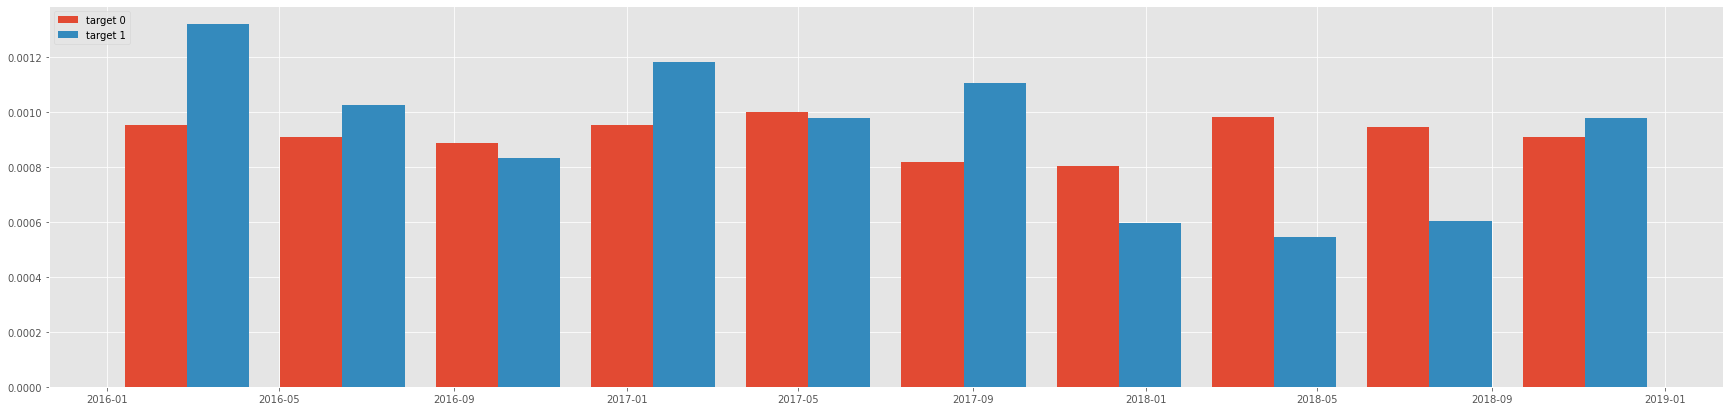

In [90]:
test_0=test[test['target_var']==0]   # records wih target_var==0
test_1=test[test['target_var']==1]   # records wih target_var==1

test_0 =test_0.reset_index()
test_1 =test_1.reset_index()

test_0= test_0["OBS_DATE"]
test_1 = test_1["OBS_DATE"]

test_0 = pd.DataFrame(test_0)
test_1 = pd.DataFrame(test_1)
                       
fig, ax = plt.subplots(figsize=(30, 7))
plt.hist([test_0["OBS_DATE"],test_1["OBS_DATE"]], density=True, label = ["target 0", "target 1"])
plt.legend(["target 0", "target 1"], loc ="upper left")

plt.show()

As shown in training dataset, the distributions of target 0 and 1 are also approximately the same over the years, explaining that for that evaluation process, model is not using majority voting approach. Also same consistency between training and test dataset shows the quality of data prepared.



---


**Deleting the new column which was used for indexing.**

In [91]:
train = train.reset_index()
train = train.drop(columns = ['OBS_DATE'])
test = test.reset_index()
test = test.drop(columns =['OBS_DATE'])


In [92]:

train

income_trans_new  loan_amount_new  schufa_new  term_length_new  \
0            -0.730429        -0.408045    0.278537        -1.657103   
1            -0.783476        -0.739783    0.783192        -0.311176   
2             0.064665         0.277472    1.262249         0.156210   
3             0.360769         0.994230    1.936597         1.013105   
4             0.514060         1.402004   -0.973914        -1.152595   
...                ...              ...         ...              ...   
7543         -1.099668        -0.310176    0.902143         1.142054   
7544          0.778120         1.077120   -0.902922         1.856416   
7545         -0.434536        -0.507296    0.599916         1.605068   
7546         -0.342565        -0.622519   -1.060166         1.142054   
7547          0.161843        -1.184553   -0.293636        -1.106976   

      log_install_to_inc  num_applic  target_var  marital_Divorced  \
0               0.061914    1.557433           0                 0   
1              -0.424735   -0.642082           0                 0   
2               0.867884    1.557433           0                 0   
3               0.342721   -0.642082           0                 0   
4               1.161786   -0.642082           0                 0   
...                  ...         ...         ...               ...   
7543            0.532384   -0.642082           0                 1   
7544            1.303189   -0.642082           0                 0   
7545            1.445945   -0.642082           0                 0   
7546           -0.270429    1.557433           0                 0   
7547            0.610313   -0.642082           0                 0   

      marital_Living together  marital_Married  marital_Separated  \
0                           0                0                  0   
1                           0                0                  0   
2                           0                0                  0   
3                           1                0                  0   
4                           0                0                  0   
...                       ...              ...                ...   
7543                        0                0                  0   
7544                        0                0                  0   
7545                        0                0                  0   
7546                        0                0                  0   
7547                        0                1                  0   

      marital_Single  occup_1  occup_2  occup_3  occup_Employee  \
0                  1        0        0        0               0   
1                  1        0        0        0               1   
2                  1        0        0        0               0   
3                  0        0        0        0               0   
4                  1        0        0        0               0   
...              ...      ...      ...      ...             ...   
7543               0        0        0        0               0   
7544               1        0        0        0               0   
7545               1        0        0        0               0   
7546               1        0        0        0               0   
7547               0        0        0        0               0   

      occup_Student  occup_Worker  
0                 0             1  
1                 0             0  
2                 1             0  
3                 0             1  
4                 1             0  
...             ...           ...  
7543              0             1  
7544              1             0  
7545              1             0  
7546              0             1  
7547              1             0  

[7548 rows x 18 columns]

In [93]:
test

income_trans_new  loan_amount_new  schufa_new  term_length_new  \
0             0.288091         0.002523    1.981897        -0.931269   
1             0.497088         1.124175   -1.255965        -1.892417   
2            -0.965920        -0.282457   -1.738758         0.156210   
3            -0.965920        -0.282457   -1.738758         0.156210   
4            -0.965920        -0.282457   -1.738758         0.156210   
...                ...              ...         ...              ...   
3045         -0.939456        -0.784314    0.142556        -2.087786   
3046          0.468754         0.225811    0.235114         0.986914   
3047          0.573176         1.379135    0.069015         0.907505   
3048         -0.018198         0.789910    0.359164         0.960586   
3049          2.157777         1.171010   -0.878771        -0.171810   

      log_install_to_inc  num_applic  target_var  marital_Divorced  \
0              -0.415321    1.557433           0                 0   
1               1.658566   -0.642082           0                 0   
2               1.270906   -0.642082           1                 0   
3               1.270906   -0.642082           1                 0   
4               1.270906   -0.642082           1                 0   
...                  ...         ...         ...               ...   
3045            0.470164    1.557433           0                 0   
3046           -0.695041    1.557433           0                 0   
3047           -0.190595   -0.642082           0                 0   
3048            1.543834   -0.642082           0                 0   
3049           -1.131285   -0.642082           0                 0   

      marital_Living together  marital_Married  marital_Separated  \
0                           1                0                  0   
1                           0                0                  0   
2                           0                0                  0   
3                           0                0                  0   
4                           0                0                  0   
...                       ...              ...                ...   
3045                        0                1                  0   
3046                        0                0                  0   
3047                        0                0                  0   
3048                        0                0                  1   
3049                        1                0                  0   

      marital_Single  occup_1  occup_2  occup_3  occup_Employee  \
0                  0        0        0        0               0   
1                  1        0        0        0               0   
2                  1        0        0        0               0   
3                  1        0        0        0               0   
4                  1        0        0        0               0   
...              ...      ...      ...      ...             ...   
3045               0        0        0        0               0   
3046               1        0        0        0               1   
3047               1        1        0        0               0   
3048               0        0        0        0               0   
3049               0        0        0        0               1   

      occup_Student  occup_Worker  
0                 0             1  
1                 1             0  
2                 1             0  
3                 1             0  
4                 1             0  
...             ...           ...  
3045              0             1  
3046              0             0  
3047              0             0  
3048              1             0  
3049              0             0  

[3050 rows x 18 columns]



---

**Dependent and Independent features Splitting for the modeling process**

In [94]:
y_train = train["target_var"]
y_test =test["target_var"]
X_train = train.drop(columns = ["target_var"])
X_test = test.drop(columns = ["target_var"])
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape )

(7548, 17) (7548,) (3050, 17) (3050,)


## **3.2) Feature Selection**

###**3.2.1) Random forest Feature Selection**

Feature selection using Random forest comes under the category of Embedded methods. Embedded methods combine the qualities of filter and wrapper methods. They are implemented by algorithms that have their own built-in feature selection methods. Wrapper approch is an optimization approach which use model to test different feature candidate batches, and therefore indicate the final effect and importance of the features over the model or equivalently over target. Some of the benefits of embedded methods are :

.They are highly accurate.
.They generalize better.
.They are interpretable

Since we have Numerical features and one-hot-encoded features which can also be classified as numerical variables, random forest would give weight equally to numerical and one-hot-encoded variables. Random Forests and decision trees, in general, give preference to features with high cardinality ( Trees are biased to these type of variables ). Categorical variables are said to possess high cardinality, beacause there are too many of their unique values, But when they are ont-hot encoded their cardinality behaviour will decrease. Therefore using Random Forest for feature selection would be a good choice, and it will give us the feature relative importance, because as mentioned it is performing like Decision Tree.

A common approach toward feature selction is to do it first on training dataset and then implement accordingly on test dataset. however this is not a hard rule. In some cases feature selection could happen before splitting data set.

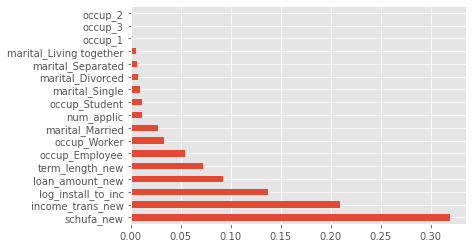

In [95]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

(pd.Series(model.feature_importances_, index=X_train.columns)
   .nlargest(17)
   .plot(kind='barh'))

As shown above sum of importance of all these features is 100, and schufa, income and install_to_inc have highest importance sequentially.

###**3.2.2) Feature Selection using Heatmap**

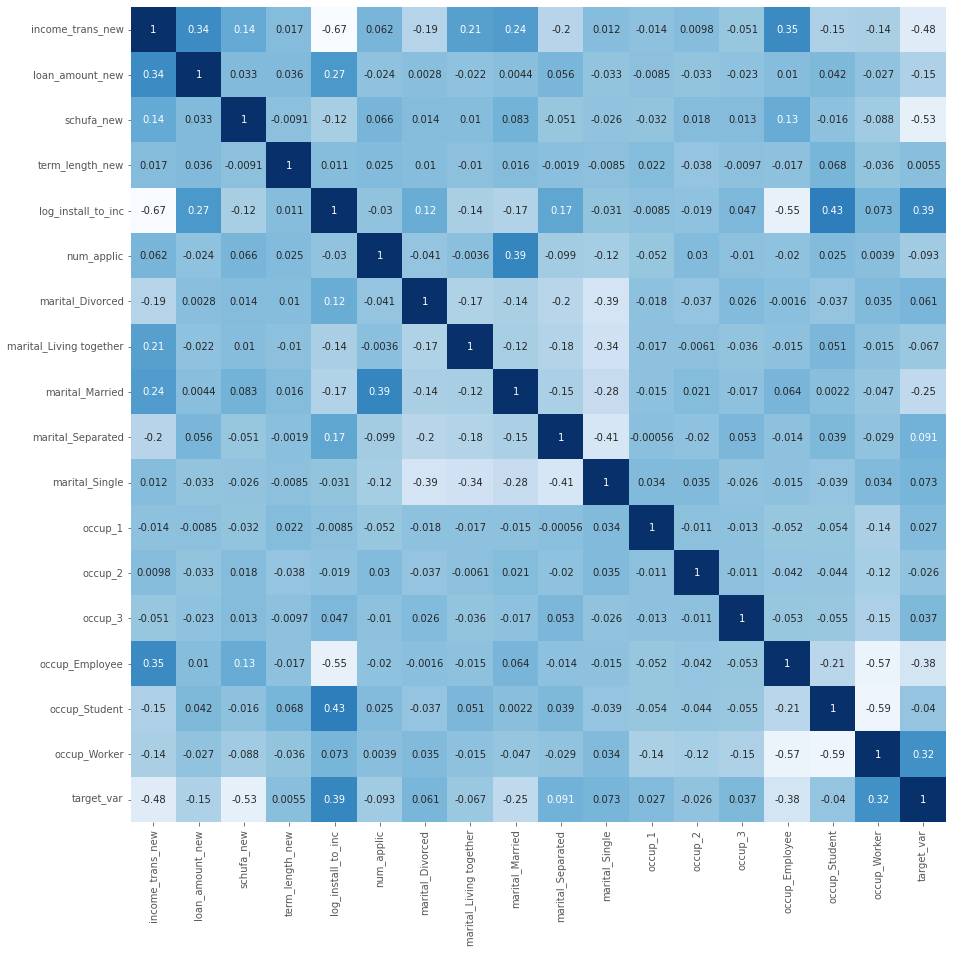

In [96]:
list1 = list(X_train)
list1.append("target_var")
cormat=train[list1].corr(method='pearson')
plt.figure(figsize = (15,15))
sns.heatmap(cormat,square=True,annot=True,cmap="Blues",cbar=False,xticklabels=True, yticklabels=True, vmax = 0.9)



As previously discussed about the concept of heatmap, schufa and income have sequentially -0.53 and -0.48 correlation with target feature, serving the interpretation of the random forest feature selection that showed schufa and income are the highest important variables.

In [97]:
X_train

income_trans_new  loan_amount_new  schufa_new  term_length_new  \
0            -0.730429        -0.408045    0.278537        -1.657103   
1            -0.783476        -0.739783    0.783192        -0.311176   
2             0.064665         0.277472    1.262249         0.156210   
3             0.360769         0.994230    1.936597         1.013105   
4             0.514060         1.402004   -0.973914        -1.152595   
...                ...              ...         ...              ...   
7543         -1.099668        -0.310176    0.902143         1.142054   
7544          0.778120         1.077120   -0.902922         1.856416   
7545         -0.434536        -0.507296    0.599916         1.605068   
7546         -0.342565        -0.622519   -1.060166         1.142054   
7547          0.161843        -1.184553   -0.293636        -1.106976   

      log_install_to_inc  num_applic  marital_Divorced  \
0               0.061914    1.557433                 0   
1              -0.424735   -0.642082                 0   
2               0.867884    1.557433                 0   
3               0.342721   -0.642082                 0   
4               1.161786   -0.642082                 0   
...                  ...         ...               ...   
7543            0.532384   -0.642082                 1   
7544            1.303189   -0.642082                 0   
7545            1.445945   -0.642082                 0   
7546           -0.270429    1.557433                 0   
7547            0.610313   -0.642082                 0   

      marital_Living together  marital_Married  marital_Separated  \
0                           0                0                  0   
1                           0                0                  0   
2                           0                0                  0   
3                           1                0                  0   
4                           0                0                  0   
...                       ...              ...                ...   
7543                        0                0                  0   
7544                        0                0                  0   
7545                        0                0                  0   
7546                        0                0                  0   
7547                        0                1                  0   

      marital_Single  occup_1  occup_2  occup_3  occup_Employee  \
0                  1        0        0        0               0   
1                  1        0        0        0               1   
2                  1        0        0        0               0   
3                  0        0        0        0               0   
4                  1        0        0        0               0   
...              ...      ...      ...      ...             ...   
7543               0        0        0        0               0   
7544               1        0        0        0               0   
7545               1        0        0        0               0   
7546               1        0        0        0               0   
7547               0        0        0        0               0   

      occup_Student  occup_Worker  
0                 0             1  
1                 0             0  
2                 1             0  
3                 0             1  
4                 1             0  
...             ...           ...  
7543              0             1  
7544              1             0  
7545              1             0  
7546              0             1  
7547              1             0  

[7548 rows x 17 columns]

In [98]:
X_test

income_trans_new  loan_amount_new  schufa_new  term_length_new  \
0             0.288091         0.002523    1.981897        -0.931269   
1             0.497088         1.124175   -1.255965        -1.892417   
2            -0.965920        -0.282457   -1.738758         0.156210   
3            -0.965920        -0.282457   -1.738758         0.156210   
4            -0.965920        -0.282457   -1.738758         0.156210   
...                ...              ...         ...              ...   
3045         -0.939456        -0.784314    0.142556        -2.087786   
3046          0.468754         0.225811    0.235114         0.986914   
3047          0.573176         1.379135    0.069015         0.907505   
3048         -0.018198         0.789910    0.359164         0.960586   
3049          2.157777         1.171010   -0.878771        -0.171810   

      log_install_to_inc  num_applic  marital_Divorced  \
0              -0.415321    1.557433                 0   
1               1.658566   -0.642082                 0   
2               1.270906   -0.642082                 0   
3               1.270906   -0.642082                 0   
4               1.270906   -0.642082                 0   
...                  ...         ...               ...   
3045            0.470164    1.557433                 0   
3046           -0.695041    1.557433                 0   
3047           -0.190595   -0.642082                 0   
3048            1.543834   -0.642082                 0   
3049           -1.131285   -0.642082                 0   

      marital_Living together  marital_Married  marital_Separated  \
0                           1                0                  0   
1                           0                0                  0   
2                           0                0                  0   
3                           0                0                  0   
4                           0                0                  0   
...                       ...              ...                ...   
3045                        0                1                  0   
3046                        0                0                  0   
3047                        0                0                  0   
3048                        0                0                  1   
3049                        1                0                  0   

      marital_Single  occup_1  occup_2  occup_3  occup_Employee  \
0                  0        0        0        0               0   
1                  1        0        0        0               0   
2                  1        0        0        0               0   
3                  1        0        0        0               0   
4                  1        0        0        0               0   
...              ...      ...      ...      ...             ...   
3045               0        0        0        0               0   
3046               1        0        0        0               1   
3047               1        1        0        0               0   
3048               0        0        0        0               0   
3049               0        0        0        0               1   

      occup_Student  occup_Worker  
0                 0             1  
1                 1             0  
2                 1             0  
3                 1             0  
4                 1             0  
...             ...           ...  
3045              0             1  
3046              0             0  
3047              0             0  
3048              1             0  
3049              0             0  

[3050 rows x 17 columns]

In [99]:
# X_train = X_train.drop(columns=["occup_1", "occup_2", "occup_3","marital_Divorced","occup_Student", "marital_Living together", "marital_Separated", "marital_Single", "num_applic","marital_Married", "occup_Worker"])
# X_test = X_test.drop(columns=["occup_1", "occup_2", "occup_3", "marital_Divorced","occup_Student","marital_Living together", "marital_Separated", "marital_Single", "num_applic", "marital_Married", "occup_Worker" ])
# X_train = X_train.drop(columns=["marital_Divorced","occup_Student","income_trans_new" ])
# X_test = X_test.drop(columns=["marital_Divorced","occup_Student", "income_trans_new" ])

# marital_Married is removed : ROC 0.92  , occup_Worker is removed : ROC 0.92   , occup_Employee is  removed : ROC  0.90 , term_length_new is removed : ROC 0.90 , loan_amount_new is removed ROC 0.90
# log_install_to_inc is removed ROC 0.89.

In modeling process,we use all features. However if we use different set of the features based on their importances which was discussed in feature selection part(3.2), we will confront with a interesting phenomena which is discussed at the end of ROC curve analysis.

*****for the dropping the features, use the above cell.


#**4) Processing (Modeling)**

##**4.1)  Logistic Regression** 

In [100]:
model = LogisticRegression(C=10, solver='lbfgs')
model.fit(X_train, y_train)
# penalty : str, ‘l1’, ‘l2’, ‘elasticnet’ or ‘none’, optional (default=’l2’)
# tol : Tolerance for stopping criteria.
# C : Inverse of regularization strength
# solver : Algorithm to use in the optimization problem{ ‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}
# max_iter : Maximum number of iterations taken for the solvers to converge.

LogisticRegression(C=10)

In [101]:
model.predict(X_test)

array([0, 1, 1, ..., 0, 0, 0])

In [102]:
#DEFINE YOUR CLASSIFIER and THE PARAMETERS GRID
from sklearn.linear_model import LogisticRegression
import numpy as np

classifier = LogisticRegression()
parameters = {"C":[1e-4,1e-3,1e-2,1e-1,1,10],"penalty":['l1','l2'] }

In [103]:
#DEFINE YOUR GRIDSEARCH 
'''
GS perfoms an exhaustive search over specified parameter values for an estimator.
GS uses a Stratified K-Folds cross-validator
(The folds are made by preserving the percentage of samples for each class.)
If refit=True the model is retrained on the whole training set with the best found params
'''
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(classifier, parameters, cv=3, scoring = 'accuracy', verbose=50, n_jobs=-1, refit=True)

In [104]:
#TRAIN YOUR CLASSIFIER
gs = gs.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
18 fits failed out of a total of 36.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solver

In [105]:
#summarize the results of your GRIDSEARCH
print('***GRIDSEARCH RESULTS***')

print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

***GRIDSEARCH RESULTS***
Best score: 0.857843 using {'C': 0.1, 'penalty': 'l2'}
nan (nan) with: {'C': 0.0001, 'penalty': 'l1'}
0.706147 (0.011952) with: {'C': 0.0001, 'penalty': 'l2'}
nan (nan) with: {'C': 0.001, 'penalty': 'l1'}
0.837705 (0.022149) with: {'C': 0.001, 'penalty': 'l2'}
nan (nan) with: {'C': 0.01, 'penalty': 'l1'}
0.855723 (0.014614) with: {'C': 0.01, 'penalty': 'l2'}
nan (nan) with: {'C': 0.1, 'penalty': 'l1'}
0.857843 (0.015689) with: {'C': 0.1, 'penalty': 'l2'}
nan (nan) with: {'C': 1, 'penalty': 'l1'}
0.855856 (0.012595) with: {'C': 1, 'penalty': 'l2'}
nan (nan) with: {'C': 10, 'penalty': 'l1'}
0.856253 (0.011567) with: {'C': 10, 'penalty': 'l2'}


In [106]:
#TEST ON YOUR TEST SET 
best_model = gs.best_estimator_
y_pred = best_model.predict(X_test)

In [107]:
#This is your prediction on the TEST SET
y_pred.shape

(3050,)

In [108]:
#EVALUATE YOUR PREDICTION (on the y_test that you left aside)
from sklearn.metrics import f1_score
print('***RESULTS ON TEST SET***')
print("precision: ", metrics.precision_score(y_test, y_pred)) # tp / (tp + fp)
print("recall: ", metrics.recall_score(y_test, y_pred)) # tp / (tp + fn)
print("f1_score: ", metrics.f1_score(y_test, y_pred)) #F1 = 2 * (precision * recall) / (precision + recall)
print("accuracy: ", metrics.accuracy_score(y_test, y_pred)) # (tp+tn)/m

print('***RESULTS ON TRAIN SET***')
print("f1_score: ", f1_score(y_train, best_model.predict(X_train)))   #F1 = 2 * (precision * recall) / (precision + recall)
print("precision: ", metrics.precision_score(y_train, best_model.predict(X_train))) # tp / (tp + fp)
print("recall: ", metrics.recall_score(y_train, best_model.predict(X_train))) # tp / (tp + fn)
print("accuracy: ", metrics.accuracy_score(y_train, best_model.predict(X_train))) # (tp+tn)/m





***RESULTS ON TEST SET***
precision:  0.8662597114317425
recall:  0.8914905768132496
f1_score:  0.8786940613566001
accuracy:  0.858688524590164
***RESULTS ON TRAIN SET***
f1_score:  0.8793952582751116
precision:  0.8565372601517179
recall:  0.9035067074605789
accuracy:  0.8604928457869634


The difference between model performances over training dataset and test dataset is about 1 percent for all criteria, meaning that the model is not overfitted over training dataset and hence can be considered as a robust model.

In [109]:
#PRINT SOME FURTHER METRICS
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83      1299
           1       0.87      0.89      0.88      1751

    accuracy                           0.86      3050
   macro avg       0.86      0.85      0.85      3050
weighted avg       0.86      0.86      0.86      3050



In [110]:
#CONFUSION MATRIX
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[1058  241]
 [ 190 1561]]


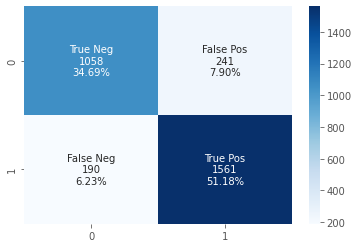

In [111]:
# Plot confusion matrix

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                confusion_matrix(y_test, y_pred).flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     confusion_matrix(y_test, y_pred).flatten()/np.sum(confusion_matrix(y_test, y_pred))]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(confusion_matrix(y_test, y_pred), annot=labels, fmt='', cmap="Blues"); #annot=True to annotate cells fmt: format



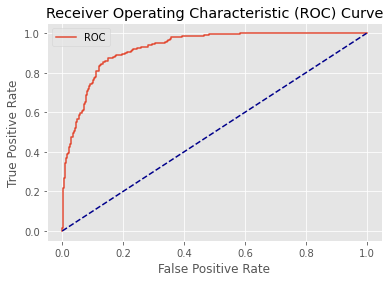

AUC for the test dataset is: 0.93
AUC for the train dataset is : 0.93


In [112]:
model = LogisticRegression(C=0.01,solver='newton-cg')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

y_probs = model.predict_proba(X_test) #predict_proba gives the probabilities for the target (0 and 1 in your case) 

fpr, tpr, thresholds=metrics.roc_curve(y_test,  y_probs[:,1])


plt.plot(fpr, tpr, label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()              

auc = metrics.roc_auc_score(y_test, y_probs[:,1])
print('AUC for the test dataset is: %.2f' % auc)


y_probs1 = model.predict_proba(X_train) #predict_proba gives the probabilities for the target (0 and 1 in your case) 
auc1 = metrics.roc_auc_score(y_train, y_probs1[:,1])
print('AUC for the train dataset is : %.2f' % auc1)

---
Using all features:  area under roc curve for logistic regression model= 0.93


---
dropping [occup_1, occup2, occup_3, marital_Living_together, marital_Sperated, marital_Single, occup_student, occup_student, num_applic, marital_Divorced] :   area under roc curve for logistic regression model = 0.93


---
dropping ''marital_Married'': area under roc curve for logistic regression model = 0.92


---
dropping ''marital_Worker'':  area under roc curve for logistic regression model = 0.92


---
dropping ''occup_Employee'':   area under roc curve for logistic regression model = 0.90


---
dropping ''term_length_new'':   area under roc curve for logistic regression model = 0.90


---
dropping ''loan_amount_new'':   area under roc curve for logistic regression model = 0.90


---
dropping ''log_install_to_inc'':   area under roc curve for logistic regression model = 0.89


---
dropping ''income_trans_new'':   area under roc curve for logistic regression model = 0.77.

Using only the variable "schufa_new" give us a performance of 0.77 for the area under roc curve, meaning that schufa(SCHUFA credit check (aka SCHUFA-Bonitätscheck) provides information about a customer's ability to pay their bills regularly, also known as 'creditworthiness') is very important and predictive. 
To be mentioned that, in this case we do not have a large dataset, and is okay to use all variables for the modeling, but for big data it is better to use most important variables like: schufa, income, install_to_inc and loan_amount. Big data needs more time to be processed. Therefore, removing some features which are not very predictive helps us to run the algorithm faster, although there migh be a slighl decrease in performance which was discussed.

###** ****Business Case**

AUC - ROC curve is a performance measurement for the classification problems at various threshold settings. ROC is a probability curve and AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes. Higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1. By analogy, the Higher the AUC, the better the model is at distinguishing between bad customers and good customers.

In our policy, we want to avoid to give loan to those who are not capable of return it, and also giving loan to those who can return it back. 
To decrease the risk of not losing from money from bad customers(False Positive Rate) and also not losing good customer(True Positive Rate or Recall), ROc curve model is used to establish a balance between two criteria. However in different case, different criteria can be used. As an example for conservative policy, only decreasing FPR(false positive rate) would be a acceptable approach. In this case False Positive Rate is (Fp/(FP+TN)  = 241/(1058+241)  =  0.18) and True Positive Rate(Recall) is 0.8914. 

## **4.2 )MLP(Multi Layer Perception)**

In [113]:
'''Multi-layer Perceptron classifier'''


model=MLPClassifier(hidden_layer_sizes=(5, 2),
              activation='relu', alpha=0.01, batch_size='auto',              
              learning_rate='constant', learning_rate_init=0.001,
              max_iter=200, solver='lbfgs', tol=0.01,
              validation_fraction=0.2, verbose=True)

# hidden_layer_sizes :  The ith element represents the number of neurons in the ith hidden layer, default (100,) . 
# activation : {‘identity’, ‘logistic’, ‘tanh’, ‘relu’}, default ‘relu’
    #Activation function for the hidden layer.
    #        ‘identity’, no-op activation, useful to implement linear bottleneck, returns f(x) = x
    #        ‘logistic’, the logistic sigmoid function, returns f(x) = 1 / (1 + exp(-x)).
    #        ‘tanh’, the hyperbolic tan function, returns f(x) = tanh(x).
    #        ‘relu’, the rectified linear unit function, returns f(x) = max(0, x)
# solver : {‘lbfgs’, ‘sgd’, ‘adam’}, default ‘adam’
    #      ‘lbfgs’ is an optimizer in the family of quasi-Newton methods.
    #        ‘sgd’ refers to stochastic gradient descent.
    #        ‘adam’ refers to a stochastic gradient-based optimizer proposed by Kingma, Diederik, and Jimmy Ba
# alpha : float, optional, default 0.0001
    #L2 penalty (regularization term) parameter.
# batch_size :Size of minibatches for stochastic optimizers. When set to “auto”, batch_size=min(200, n_samples)
# learning_rate : {‘constant’, ‘invscaling’, ‘adaptive’}, default ‘constant’
    #    ‘constant’ is a constant learning rate given by ‘learning_rate_init’.
    #    ‘invscaling’ gradually decreases the learning rate at each time step ‘t’ using an inverse scaling exponent of ‘power_t’. effective_learning_rate = learning_rate_init / pow(t, power_t)
    #    ‘adaptive’ keeps the learning rate constant to ‘learning_rate_init’ as long as training loss keeps decreasing. Each time two consecutive epochs fail to decrease training loss by at least tol, or fail to increase validation score by at least tol if ‘early_stopping’ is on, the current learning rate is divided by 5.
# learning_rate_init : double, optional, default 0.001
# max_iter : Maximum number of iterations.
# tol :Tolerance for the optimization.
# verbose : 
# validation_fraction : The proportion of training data to set aside as validation set for early stopping. 

model.fit(X_train, y_train)
model.predict(X_test)

array([0, 1, 1, ..., 0, 0, 0])

In [114]:
'''Multi-layer Perceptron classifier'''

classifier = MLPClassifier()
parameters = {"hidden_layer_sizes":[(5, 2),(10,8,5)],  "max_iter": [2000], "alpha": [0.00001,0.1,1]}
#hidden_layer_sizes : The ith element represents the number of neurons in the ith hidden layer.

In [115]:
#DEFINE YOUR GRIDSEARCH 
'''
GS perfoms an exhaustive search over specified parameter values for an estimator.
GS uses a Stratified K-Folds cross-validator
(The folds are made by preserving the percentage of samples for each class.)
If refit=True the model is retrained on the whole training set with the best found params
'''

gs = GridSearchCV(classifier, parameters, cv=3, scoring = 'accuracy', verbose=50, n_jobs=-1, refit=True)

In [116]:
#TRAIN YOUR CLASSIFIER
gs = gs.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


In [117]:
#summarize the results of your GRIDSEARCH
print('***GRIDSEARCH RESULTS***')

print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

***GRIDSEARCH RESULTS***
Best score: 0.859300 using {'alpha': 1, 'hidden_layer_sizes': (5, 2), 'max_iter': 2000}
0.853339 (0.011844) with: {'alpha': 1e-05, 'hidden_layer_sizes': (5, 2), 'max_iter': 2000}
0.827239 (0.012376) with: {'alpha': 1e-05, 'hidden_layer_sizes': (10, 8, 5), 'max_iter': 2000}
0.853339 (0.006259) with: {'alpha': 0.1, 'hidden_layer_sizes': (5, 2), 'max_iter': 2000}
0.838500 (0.012031) with: {'alpha': 0.1, 'hidden_layer_sizes': (10, 8, 5), 'max_iter': 2000}
0.859300 (0.015738) with: {'alpha': 1, 'hidden_layer_sizes': (5, 2), 'max_iter': 2000}
0.857181 (0.009089) with: {'alpha': 1, 'hidden_layer_sizes': (10, 8, 5), 'max_iter': 2000}


In [118]:
#TEST ON YOUR TEST SET 
best_model = gs.best_estimator_
y_pred = best_model.predict(X_test)

In [119]:
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [120]:
#EVALUATE YOUR PREDICTION (on the y_test that you left aside)

print('***RESULTS ON TEST SET***')
print("precision: ", metrics.precision_score(y_test, y_pred)) # tp / (tp + fp)
print("recall: ", metrics.recall_score(y_test, y_pred)) # tp / (tp + fn)
print("f1_score: ", metrics.f1_score(y_test, y_pred)) #F1 = 2 * (precision * recall) / (precision + recall)
print("accuracy: ", metrics.accuracy_score(y_test, y_pred)) # (tp+tn)/m

print('***RESULTS ON TRAIN SET***')
print("f1_score: ", f1_score(y_train, best_model.predict(X_train)))   #F1 = 2 * (precision * recall) / (precision + recall)
print("precision: ", metrics.precision_score(y_train, best_model.predict(X_train))) # tp / (tp + fp)
print("recall: ", metrics.recall_score(y_train, best_model.predict(X_train))) # tp / (tp + fn)
print("accuracy: ", metrics.accuracy_score(y_train, best_model.predict(X_train))) # (tp+tn)/m

***RESULTS ON TEST SET***
precision:  0.5740983606557377
recall:  1.0
f1_score:  0.7294313684649032
accuracy:  0.5740983606557377
***RESULTS ON TRAIN SET***
f1_score:  0.7203526320250911
precision:  0.56293057763646
recall:  1.0
accuracy:  0.56293057763646


In [121]:
#PRINT SOME FURTHER METRICS
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1299
           1       0.57      1.00      0.73      1751

    accuracy                           0.57      3050
   macro avg       0.29      0.50      0.36      3050
weighted avg       0.33      0.57      0.42      3050



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [122]:
#CONFUSION MATRIX
print(confusion_matrix(y_test, y_pred)) 

[[   0 1299]
 [   0 1751]]


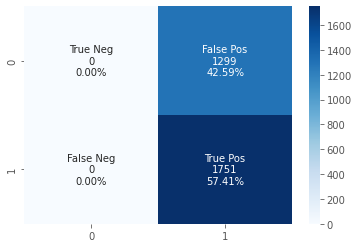

In [123]:
# Plot confusion matrix

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                confusion_matrix(y_test, y_pred).flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     confusion_matrix(y_test, y_pred).flatten()/np.sum(confusion_matrix(y_test, y_pred))]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(confusion_matrix(y_test, y_pred), annot=labels, fmt='', cmap="Blues"); #annot=True to annotate cells fmt: format



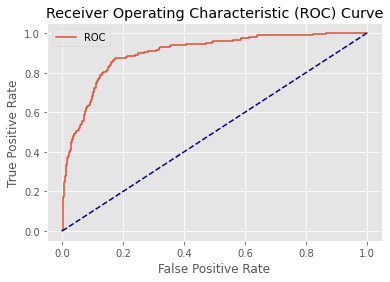

AUC for the test dataset is : 0.90
AUC for the train dataset is : 0.96


In [124]:
model=MLPClassifier(hidden_layer_sizes=(10,8,5), alpha=0.01, max_iter=2000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

y_probs = model.predict_proba(X_test) #predict_proba gives the probabilities for the target (0 and 1 in your case) 

fpr, tpr, thresholds=metrics.roc_curve(y_test,  y_probs[:,1])

plt.plot(fpr, tpr, label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

auc = metrics.roc_auc_score(y_test, y_probs[:,1])
print('AUC for the test dataset is : %.2f' % auc)



y_probs1 = model.predict_proba(X_train) #predict_proba gives the probabilities for the target (0 and 1 in your case) 
auc1 = metrics.roc_auc_score(y_train, y_probs1[:,1])
print('AUC for the train dataset is : %.2f' % auc1)









##**4.3) Support Vector Machine(SVM)**

In [125]:


model = SVC(kernel='linear',C=1, class_weight="balanced")

# C : Penalty parameter C of the error term.
# kernel : kernel type. It must be one of ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ or a callable. If none is given, ‘rbf’ will be used. If a callable is given it is used to pre-compute the kernel matrix from data matrices; that matrix should be an array of shape (n_samples, n_samples).
# degree : Degree of the polynomial kernel function (‘poly’)
# gamma : Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.
# coef0 : Independent term in kernel function.
# tol : Tolerance for stopping criterion.
# class_weight : Set the parameter C of class i to class_weight[i]*C for SVC.

In [126]:
model.fit(X_train, y_train)
model.predict(X_test)

array([0, 1, 1, ..., 0, 0, 0])

In [127]:
#DEFINE YOUR CLASSIFIER and THE PARAMETERS GRID
classifier = SVC()
parameters = {"kernel":['linear'], "C":[0.1,100],"gamma":[1]}

In [128]:
#DEFINE YOUR GRIDSEARCH 
'''
GS perfoms an exhaustive search over specified parameter values for an estimator.
GS uses a Stratified K-Folds cross-validator
(The folds are made by preserving the percentage of samples for each class.)
If refit=True the model is retrained on the whole training set with the best found params
'''
gs = GridSearchCV(classifier, parameters, cv=3, scoring = 'f1', verbose=50, n_jobs=-1, refit=True)

In [129]:
#TRAIN YOUR CLASSIFIER
gs = gs.fit(X_train, y_train)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


In [130]:
#summarize the results of your GRIDSEARCH
print('***GRIDSEARCH RESULTS***')

print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

***GRIDSEARCH RESULTS***
Best score: 0.875803 using {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}
0.875803 (0.008798) with: {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}
0.875349 (0.009896) with: {'C': 100, 'gamma': 1, 'kernel': 'linear'}


In [131]:
#TEST ON YOUR TEST SET 
best_model = gs.best_estimator_
y_pred = best_model.predict(X_test)

In [132]:
#This is your prediction on the TEST SET
y_pred

array([0, 1, 1, ..., 0, 0, 0])

In [133]:
#EVALUATE YOUR PREDICTION (on the y_test that you left aside)
print('***RESULTS ON TEST SET***')
print("precision: ", metrics.precision_score(y_test, y_pred)) # tp / (tp + fp)
print("recall: ", metrics.recall_score(y_test, y_pred)) # tp / (tp + fn)
print("f1_score: ", metrics.f1_score(y_test, y_pred)) #F1 = 2 * (precision * recall) / (precision + recall)
print("accuracy: ", metrics.accuracy_score(y_test, y_pred)) # (tp+tn)/m

print('***RESULTS ON TRAIN SET***')
print("f1_score: ", f1_score(y_train, best_model.predict(X_train)))   #F1 = 2 * (precision * recall) / (precision + recall)
print("precision: ", metrics.precision_score(y_train, best_model.predict(X_train))) # tp / (tp + fp)
print("recall: ", metrics.recall_score(y_train, best_model.predict(X_train))) # tp / (tp + fn)
print("accuracy: ", metrics.accuracy_score(y_train, best_model.predict(X_train))) # (tp+tn)/m

***RESULTS ON TEST SET***
precision:  0.8602860286028603
recall:  0.8932038834951457
f1_score:  0.8764359764639955
accuracy:  0.8554098360655737
***RESULTS ON TRAIN SET***
f1_score:  0.8834314169307379
precision:  0.8508829300196207
recall:  0.9185690750764886
accuracy:  0.8635400105988341


In [134]:
#PRINT SOME FURTHER METRICS
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.80      0.83      1299
           1       0.86      0.89      0.88      1751

    accuracy                           0.86      3050
   macro avg       0.85      0.85      0.85      3050
weighted avg       0.86      0.86      0.85      3050



In [135]:
#CONFUSION MATRIX
print(confusion_matrix(y_test, y_pred))

[[1045  254]
 [ 187 1564]]


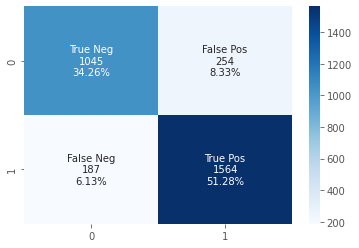

In [136]:
# Plot confusion matrix

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                confusion_matrix(y_test, y_pred).flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     confusion_matrix(y_test, y_pred).flatten()/np.sum(confusion_matrix(y_test, y_pred))]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(confusion_matrix(y_test, y_pred), annot=labels, fmt='', cmap="Blues"); #annot=True to annotate cells fmt: format



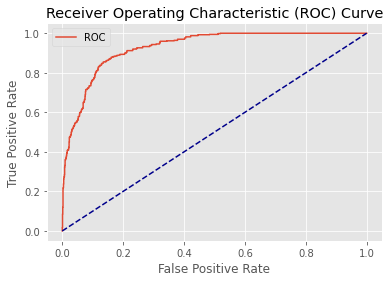

AUC for the test dataset is: 0.93
AUC for the train dataset is : 0.93


In [137]:
model = SVC(C=0.1, gamma=0.0001, kernel='linear',probability=True)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

y_probs = model.predict_proba(X_test) #predict_proba gives the probabilities for the target (0 and 1 in your case) 

fpr, tpr, thresholds=metrics.roc_curve(y_test,  y_probs[:,1])

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

auc = metrics.roc_auc_score(y_test, y_probs[:,1])
print('AUC for the test dataset is: %.2f' % auc)


y_probs1 = model.predict_proba(X_train) #predict_proba gives the probabilities for the target (0 and 1 in your case) 
auc1 = metrics.roc_auc_score(y_train, y_probs1[:,1])
print('AUC for the train dataset is : %.2f' % auc1)

##**4.4) KNN**

In [193]:
#DEFINE YOUR CLASSIFIER and THE PARAMETERS GRID


#Create KNN Classifier
knn3 = KNeighborsClassifier(n_neighbors=3)

#Train the model using the training sets
knn3.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn3.predict(X_test)


In [194]:
y_pred

array([0, 0, 1, ..., 0, 0, 0])

In [195]:
print(confusion_matrix(y_test, y_pred))

[[1094  205]
 [ 548 1203]]


In [196]:
#EVALUATE OUR PREDICTION
print('***RESULTS ON TEST SET***')
print("precision: ", metrics.precision_score(y_test, y_pred)) # tp / (tp + fp)
print("recall: ", metrics.recall_score(y_test, y_pred)) # tp / (tp + fn)
print("f1_score: ", metrics.f1_score(y_test, y_pred)) #F1 = 2 * (precision * recall) / (precision + recall)
print("accuracy: ", metrics.accuracy_score(y_test, y_pred)) # (tp+tn)/m

print('***RESULTS ON TRAIN SET***')
print("f1_score: ", f1_score(y_train, best_model.predict(X_train)))   #F1 = 2 * (precision * recall) / (precision + recall)
print("precision: ", metrics.precision_score(y_train, best_model.predict(X_train))) # tp / (tp + fp)
print("recall: ", metrics.recall_score(y_train, best_model.predict(X_train))) # tp / (tp + fn)
print("accuracy: ", metrics.accuracy_score(y_train, best_model.predict(X_train))) # (tp+tn)/m


***RESULTS ON TEST SET***
precision:  0.8544034090909091
recall:  0.6870359794403198
f1_score:  0.7616334283000948
accuracy:  0.7531147540983607
***RESULTS ON TRAIN SET***
f1_score:  0.8894618834080718
precision:  0.8492828088203811
recall:  0.9336314426923982
accuracy:  0.8693693693693694


In [197]:
#Create KNN Classifier
classifier = KNeighborsClassifier()
parameters = {'n_neighbors':np.arange(1,40)}

gs = GridSearchCV(classifier, parameters, cv=3, scoring = 'f1', verbose=90, n_jobs=-1)

In [198]:
#TRAIN YOUR CLASSIFIER
gs = gs.fit(X_train, y_train)

Fitting 3 folds for each of 39 candidates, totalling 117 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [199]:
#summarize the results of your GRIDSEARCH
print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("Mean %f Std (%f) with: %r" % (mean, stdev, param))

Best score: 0.864309 using {'n_neighbors': 39}
Mean 0.656456 Std (0.014941) with: {'n_neighbors': 1}
Mean 0.651011 Std (0.010238) with: {'n_neighbors': 2}
Mean 0.749821 Std (0.018344) with: {'n_neighbors': 3}
Mean 0.748061 Std (0.021253) with: {'n_neighbors': 4}
Mean 0.800362 Std (0.005560) with: {'n_neighbors': 5}
Mean 0.794911 Std (0.009478) with: {'n_neighbors': 6}
Mean 0.815085 Std (0.007175) with: {'n_neighbors': 7}
Mean 0.812351 Std (0.004653) with: {'n_neighbors': 8}
Mean 0.826649 Std (0.009020) with: {'n_neighbors': 9}
Mean 0.821018 Std (0.005356) with: {'n_neighbors': 10}
Mean 0.831282 Std (0.002881) with: {'n_neighbors': 11}
Mean 0.822803 Std (0.001369) with: {'n_neighbors': 12}
Mean 0.831209 Std (0.005891) with: {'n_neighbors': 13}
Mean 0.829565 Std (0.004419) with: {'n_neighbors': 14}
Mean 0.841011 Std (0.003743) with: {'n_neighbors': 15}
Mean 0.836874 Std (0.003659) with: {'n_neighbors': 16}
Mean 0.843461 Std (0.001323) with: {'n_neighbors': 17}
Mean 0.840122 Std (0.007537

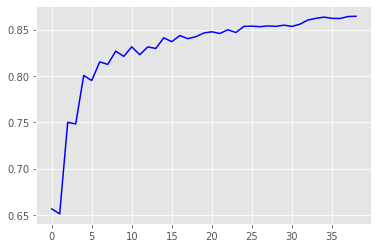

In [207]:
plt.plot (means, color='blue', alpha=1.00)
plt.show()

In [208]:
#TEST ON YOUR TEST SET 
best_model = gs.best_estimator_
y_pred = best_model.predict(X_test)

In [209]:
#This is your prediction on the TEST SET
y_pred

array([0, 1, 1, ..., 0, 1, 0])

In [210]:
#EVALUATE YOUR PREDICTION (on the y_test that you left aside)
print('***RESULTS ON TEST SET***')
print("precision: ", metrics.precision_score(y_test, y_pred)) # tp / (tp + fp)
print("recall: ", metrics.recall_score(y_test, y_pred)) # tp / (tp + fn)
print("f1_score: ", metrics.f1_score(y_test, y_pred)) #F1 = 2 * (precision * recall) / (precision + recall)
print("accuracy: ", metrics.accuracy_score(y_test, y_pred)) # (tp+tn)/m

print('***RESULTS ON TRAIN SET***')
print("f1_score: ", f1_score(y_train, best_model.predict(X_train)))   #F1 = 2 * (precision * recall) / (precision + recall)
print("precision: ", metrics.precision_score(y_train, best_model.predict(X_train))) # tp / (tp + fp)
print("recall: ", metrics.recall_score(y_train, best_model.predict(X_train))) # tp / (tp + fn)
print("accuracy: ", metrics.accuracy_score(y_train, best_model.predict(X_train))) # (tp+tn)/m


***RESULTS ON TEST SET***
precision:  0.8104218362282879
recall:  0.932609937178755
f1_score:  0.8672331386086033
accuracy:  0.8360655737704918
***RESULTS ON TRAIN SET***
f1_score:  0.8845694429362579
precision:  0.8211693548387097
recall:  0.9585784890562485
accuracy:  0.8591679915209327


In [211]:
#PRINT SOME FURTHER METRICS
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.71      0.79      1299
           1       0.81      0.93      0.87      1751

    accuracy                           0.84      3050
   macro avg       0.85      0.82      0.83      3050
weighted avg       0.84      0.84      0.83      3050



In [212]:
print(confusion_matrix(y_test, y_pred))

[[ 917  382]
 [ 118 1633]]


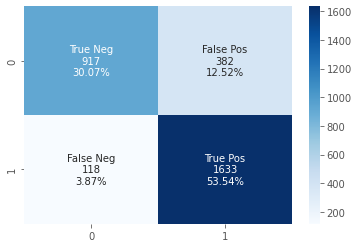

In [213]:
# Plot confusion matrix

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                confusion_matrix(y_test, y_pred).flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     confusion_matrix(y_test, y_pred).flatten()/np.sum(confusion_matrix(y_test, y_pred))]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(confusion_matrix(y_test, y_pred), annot=labels, fmt='', cmap="Blues"); #annot=True to annotate cells fmt: format






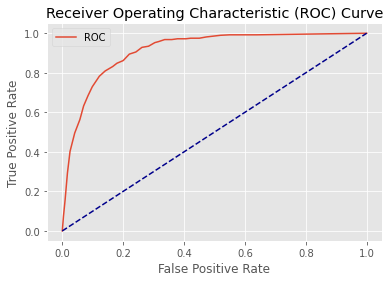

AUC for the test dataset is: 0.91
AUC for the train dataset is : 0.94


In [214]:
model = KNeighborsClassifier(n_neighbors=36)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

y_probs = model.predict_proba(X_test) #predict_proba gives the probabilities for the target (0 and 1 in your case) 

fpr, tpr, thresholds=metrics.roc_curve(y_test,  y_probs[:,1])

plt.plot(fpr, tpr, label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

auc = metrics.roc_auc_score(y_test, y_probs[:,1])
print('AUC for the test dataset is: %.2f' % auc)

y_probs1 = model.predict_proba(X_train) #predict_proba gives the probabilities for the target (0 and 1 in your case) 
auc1 = metrics.roc_auc_score(y_train, y_probs1[:,1])
print('AUC for the train dataset is : %.2f' % auc1)

##**4.5) Naive BAyes**

In [153]:
'''
NAIVE BAYES classifier:

(1) Training is fast because only the probability of each class and the probability of each class given different input (x) values need to be calculated. 
(2) No coefficients need to be fitted by optimization procedures!

Bernoulli Naive Bayes: it assumes that all our features are binary.
Multinomial Naive Bayes: it is used when we discrete data
Gaussian Naive Bayes: Naive Bayes can be extended to real-valued attributes, 
    most commonly by assuming a Gaussian distribution.
    we can give prior probabilities of the classes with the parameter 
    priors : array-like, y_pred=shape (n_classes,)
'''

model = GaussianNB()

model.fit(X_train, y_train)
y_pred=model.predict(X_test)

In [154]:
#EVALUATE YOUR PREDICTION (on the y_test that you left aside)
print('***RESULTS ON TEST SET***')
print("precision: ", metrics.precision_score(y_test, y_pred)) # tp / (tp + fp)
print("recall: ", metrics.recall_score(y_test, y_pred)) # tp / (tp + fn)
print("f1_score: ", metrics.f1_score(y_test, y_pred)) #F1 = 2 * (precision * recall) / (precision + recall)
print("accuracy: ", metrics.accuracy_score(y_test, y_pred)) # (tp+tn)/m

print('***RESULTS ON TRAIN SET***')
print("f1_score: ", f1_score(y_train, best_model.predict(X_train)))   #F1 = 2 * (precision * recall) / (precision + recall)
print("precision: ", metrics.precision_score(y_train, best_model.predict(X_train))) # tp / (tp + fp)
print("recall: ", metrics.recall_score(y_train, best_model.predict(X_train))) # tp / (tp + fn)
print("accuracy: ", metrics.accuracy_score(y_train, best_model.predict(X_train))) # (tp+tn)/m

***RESULTS ON TEST SET***
precision:  0.801
recall:  0.9149057681324957
f1_score:  0.8541722207411359
accuracy:  0.8206557377049181
***RESULTS ON TRAIN SET***
f1_score:  0.8845694429362579
precision:  0.8211693548387097
recall:  0.9585784890562485
accuracy:  0.8591679915209327


In [155]:
#PRINT SOME FURTHER METRICS
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.69      0.77      1299
           1       0.80      0.91      0.85      1751

    accuracy                           0.82      3050
   macro avg       0.83      0.80      0.81      3050
weighted avg       0.83      0.82      0.82      3050



In [156]:
#CONFUSION MATRIX
print(confusion_matrix(y_test, y_pred))

[[ 901  398]
 [ 149 1602]]


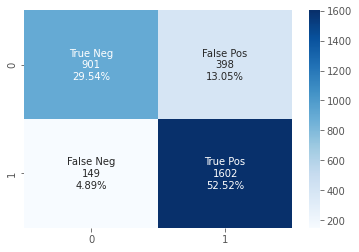

In [157]:
# Plot confusion matrix

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                confusion_matrix(y_test, y_pred).flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     confusion_matrix(y_test, y_pred).flatten()/np.sum(confusion_matrix(y_test, y_pred))]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(confusion_matrix(y_test, y_pred), annot=labels, fmt='', cmap="Blues"); #annot=True to annotate cells fmt: format



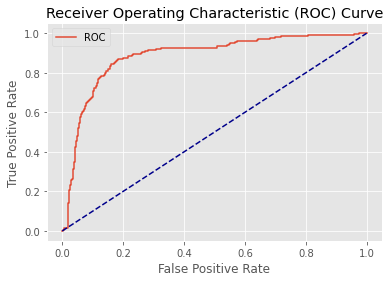

AUC for the test dataset is: 0.88
AUC for the train dataset is : 0.88


In [158]:
y_probs = model.predict_proba(X_test) #predict_proba gives the probabilities for the target (0 and 1 in your case) 

fpr, tpr, thresholds=metrics.roc_curve(y_test,  y_probs[:,1])

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

auc = metrics.roc_auc_score(y_test, y_probs[:,1])
print('AUC for the test dataset is: %.2f' % auc)

y_probs1 = model.predict_proba(X_train) #predict_proba gives the probabilities for the target (0 and 1 in your case) 
auc1 = metrics.roc_auc_score(y_train, y_probs1[:,1])
print('AUC for the train dataset is : %.2f' % auc1)

##**4.6)  Decision Tree**


In [159]:
model = DecisionTreeClassifier(criterion='gini', max_depth=1000, min_samples_split=2, min_samples_leaf=2)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# criterion : "gini", "entropy"
# max_depth : The maximum depth of the tree.
# min_samples_split : The minimum number of samples required to split an internal node:
# min_samples_leaf : The minimum number of samples required to be at a leaf node. 

In [160]:
print(confusion_matrix(y_test, y_pred))

[[1176  123]
 [ 766  985]]


In [161]:
#DEFINE YOUR CLASSIFIER and THE PARAMETERS GRID

classifier = DecisionTreeClassifier()
parameters = {'criterion': ['entropy','gini'], 
              'max_depth': [3,4,5],
              'min_samples_split': [5,10],
              'min_samples_leaf': [2,4]}

In [162]:
#DEFINE YOUR GRIDSEARCH 
'''
GS perfoms an exhaustive search over specified parameter values for an estimator.
GS uses a Stratified K-Folds cross-validator
(The folds are made by preserving the percentage of samples for each class.)
If refit=True the model is retrained on the whole training set with the best found params
'''
gs = GridSearchCV(classifier, parameters, cv=3, scoring = 'f1', verbose=10, n_jobs=-1, refit=True)

In [163]:
#TRAIN YOUR CLASSIFIER
gs = gs.fit(X_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


In [164]:
#summarize the results of your GRIDSEARCH
print('***GRIDSEARCH RESULTS***')

print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

***GRIDSEARCH RESULTS***
Best score: 0.857474 using {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5}
0.829090 (0.003868) with: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 5}
0.829090 (0.003868) with: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 10}
0.829090 (0.003868) with: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 5}
0.829090 (0.003868) with: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 10}
0.832203 (0.010685) with: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 5}
0.832203 (0.010685) with: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 10}
0.832203 (0.010685) with: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 5}
0.832203 (0.010685) with: {'criterion': 'entropy', 'max_dep

In [165]:
#TEST ON YOUR TEST SET 
best_model = gs.best_estimator_
y_pred = best_model.predict(X_test)

In [166]:
#This is your prediction on the TEST SET
y_pred

array([0, 1, 1, ..., 0, 0, 0])

In [167]:
#EVALUATE YOUR PREDICTION (on the y_test that you left aside)

print('***RESULTS ON TEST SET***')
print("f1_score: ", metrics.f1_score(y_test, y_pred))

***RESULTS ON TEST SET***
f1_score:  0.852557127312296


In [168]:
print('***RESULTS ON TEST SET***')
print("precision: ", metrics.precision_score(y_test, y_pred)) # tp / (tp + fp)
print("recall: ", metrics.recall_score(y_test, y_pred)) # tp / (tp + fn)
print("f1_score: ", metrics.f1_score(y_test, y_pred)) #F1 = 2 * (precision * recall) / (precision + recall)
print("accuracy: ", metrics.accuracy_score(y_test, y_pred)) # (tp+tn)/m

print('***RESULTS ON TRAIN SET***')
print("f1_score: ", f1_score(y_train, best_model.predict(X_train)))   #F1 = 2 * (precision * recall) / (precision + recall)
print("precision: ", metrics.precision_score(y_train, best_model.predict(X_train))) # tp / (tp + fp)
print("recall: ", metrics.recall_score(y_train, best_model.predict(X_train))) # tp / (tp + fn)
print("accuracy: ", metrics.accuracy_score(y_train, best_model.predict(X_train))) # (tp+tn)/m

***RESULTS ON TEST SET***
precision:  0.814025974025974
recall:  0.8949171901770417
f1_score:  0.852557127312296
accuracy:  0.8222950819672131
***RESULTS ON TRAIN SET***
f1_score:  0.8854428306213824
precision:  0.8259983700081499
recall:  0.9541068486702754
accuracy:  0.8610227874933757


In [169]:
#PRINT SOME FURTHER METRICS
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.72      0.78      1299
           1       0.81      0.89      0.85      1751

    accuracy                           0.82      3050
   macro avg       0.83      0.81      0.81      3050
weighted avg       0.82      0.82      0.82      3050



In [170]:
print(confusion_matrix(y_test, y_pred))

[[ 941  358]
 [ 184 1567]]


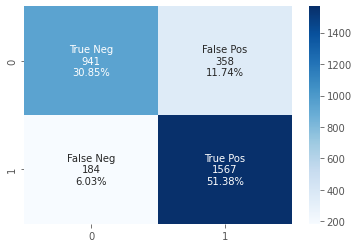

In [171]:
# Plot confusion matrix

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                confusion_matrix(y_test, y_pred).flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     confusion_matrix(y_test, y_pred).flatten()/np.sum(confusion_matrix(y_test, y_pred))]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(confusion_matrix(y_test, y_pred), annot=labels, fmt='', cmap="Blues"); #annot=True to annotate cells fmt: format



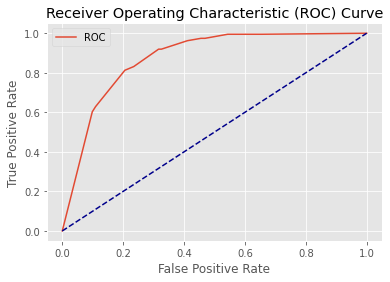

AUC for the test dataset is: 0.87
AUC for the train dataset is : 0.90


In [172]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=4, min_samples_split=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

y_probs = model.predict_proba(X_test) #predict_proba gives the probabilities for the target (0 and 1 in your case) 

fpr, tpr, thresholds=metrics.roc_curve(y_test,  y_probs[:,1])

plt.plot(fpr, tpr, label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

auc = metrics.roc_auc_score(y_test, y_probs[:,1])
print('AUC for the test dataset is: %.2f' % auc)

y_probs1 = model.predict_proba(X_train) #predict_proba gives the probabilities for the target (0 and 1 in your case) 
auc1 = metrics.roc_auc_score(y_train, y_probs1[:,1])
print('AUC for the train dataset is : %.2f' % auc1)

###**PLotting the Tree**

In [173]:
X_train.columns.tolist()

['income_trans_new',
 'loan_amount_new',
 'schufa_new',
 'term_length_new',
 'log_install_to_inc',
 'num_applic',
 'marital_Divorced',
 'marital_Living together',
 'marital_Married',
 'marital_Separated',
 'marital_Single',
 'occup_1',
 'occup_2',
 'occup_3',
 'occup_Employee',
 'occup_Student',
 'occup_Worker']

In [174]:
r = tree.export_text(model,feature_names=X_test.columns.tolist())
print(r)



|--- schufa_new <= 0.27
|   |--- income_trans_new <= 0.22
|   |   |--- occup_Employee <= 0.50
|   |   |   |--- schufa_new <= -0.37
|   |   |   |   |--- class: 1
|   |   |   |--- schufa_new >  -0.37
|   |   |   |   |--- class: 1
|   |   |--- occup_Employee >  0.50
|   |   |   |--- schufa_new <= -0.83
|   |   |   |   |--- class: 1
|   |   |   |--- schufa_new >  -0.83
|   |   |   |   |--- class: 0
|   |--- income_trans_new >  0.22
|   |   |--- occup_Employee <= 0.50
|   |   |   |--- schufa_new <= -0.48
|   |   |   |   |--- class: 1
|   |   |   |--- schufa_new >  -0.48
|   |   |   |   |--- class: 0
|   |   |--- occup_Employee >  0.50
|   |   |   |--- schufa_new <= -1.76
|   |   |   |   |--- class: 0
|   |   |   |--- schufa_new >  -1.76
|   |   |   |   |--- class: 0
|--- schufa_new >  0.27
|   |--- income_trans_new <= -1.29
|   |   |--- schufa_new <= 1.19
|   |   |   |--- occup_Worker <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- occup_Worker >  0.50
|   |   |   |   |--- class: 1
|

[Text(0.5267857142857143, 0.9, 'X[2] <= 0.268\nentropy = 0.989\nsamples = 7548\nvalue = [3299, 4249]'),
 Text(0.2857142857142857, 0.7, 'X[0] <= 0.221\nentropy = 0.885\nsamples = 5755\nvalue = [1744, 4011]'),
 Text(0.14285714285714285, 0.5, 'X[14] <= 0.5\nentropy = 0.693\nsamples = 4501\nvalue = [838, 3663]'),
 Text(0.07142857142857142, 0.3, 'X[2] <= -0.371\nentropy = 0.613\nsamples = 4114\nvalue = [623, 3491]'),
 Text(0.03571428571428571, 0.1, 'entropy = 0.462\nsamples = 3026\nvalue = [296, 2730]'),
 Text(0.10714285714285714, 0.1, 'entropy = 0.882\nsamples = 1088\nvalue = [327, 761]'),
 Text(0.21428571428571427, 0.3, 'X[2] <= -0.832\nentropy = 0.991\nsamples = 387\nvalue = [215, 172]'),
 Text(0.17857142857142858, 0.1, 'entropy = 0.905\nsamples = 209\nvalue = [67, 142]'),
 Text(0.25, 0.1, 'entropy = 0.654\nsamples = 178\nvalue = [148, 30]'),
 Text(0.42857142857142855, 0.5, 'X[14] <= 0.5\nentropy = 0.852\nsamples = 1254\nvalue = [906, 348]'),
 Text(0.35714285714285715, 0.3, 'X[2] <= -0.4

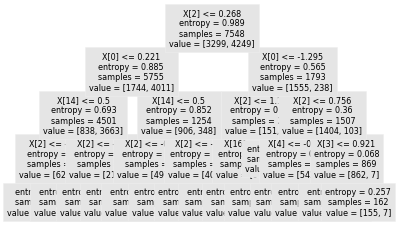

In [175]:
tree.plot_tree(model, fontsize=8)

In [176]:
# We can export as a figure but we must install graphviz https://graphviz.gitlab.io/download/

# Install a conda package in the current Jupyter kernel
#import sys
#!conda install --yes --prefix {sys.prefix} graphviz
#!{sys.executable} -m pip install graphviz

from sklearn.tree import export_graphviz
export_graphviz(model, out_file='decision_tree.dot', feature_names = X_test.columns.tolist())

In [177]:
!dot -Tpng decision_tree.dot -o decision_tree.png -Gdpi=600

In [178]:
from IPython.display import Image
Image(filename = 'decision_tree.png')

## **4.7) Random Forest**

In [179]:
rand_forest = RandomForestClassifier(n_estimators=30, criterion='entropy', max_depth=6, min_samples_split=4, min_samples_leaf=2)
#rand_forest = RandomForestClassifier()
rand_forest.fit(X_train, y_train)

y_pred = rand_forest.predict(X_test)



In [180]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.77      0.81      1299
           1       0.84      0.90      0.87      1751

    accuracy                           0.85      3050
   macro avg       0.85      0.84      0.84      3050
weighted avg       0.85      0.85      0.84      3050



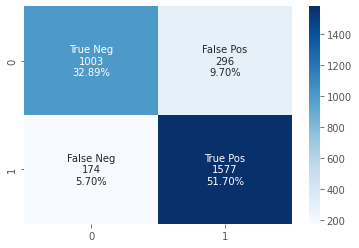

In [181]:
# Plot confusion matrix

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                confusion_matrix(y_test, y_pred).flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     confusion_matrix(y_test, y_pred).flatten()/np.sum(confusion_matrix(y_test, y_pred))]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(confusion_matrix(y_test, y_pred), annot=labels, fmt='', cmap="Blues"); #annot=True to annotate cells fmt: format



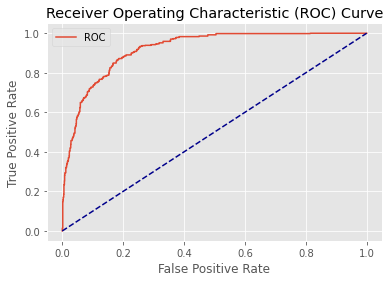

AUC for the test dataset is: 0.92
AUC for the train dataset is : 0.90


In [182]:
# ROC curve

y_probs = rand_forest.predict_proba(X_test) #predict_proba gives the probabilities for the target (0 and 1 in your case) 

fpr, tpr, thresholds=metrics.roc_curve(y_test,  y_probs[:,1])

plt.plot(fpr, tpr, label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

auc = metrics.roc_auc_score(y_test, y_probs[:,1])
print('AUC for the test dataset is: %.2f' % auc)

y_probs1 = model.predict_proba(X_train) #predict_proba gives the probabilities for the target (0 and 1 in your case) 
auc1 = metrics.roc_auc_score(y_train, y_probs1[:,1])
print('AUC for the train dataset is : %.2f' % auc1)

##**4.8)  ADAboost**

In [185]:
adaboost = AdaBoostClassifier(n_estimators=1000, base_estimator=DecisionTreeClassifier(max_depth=10))
adaboost.fit(X_train, y_train)

y_pred = adaboost.predict(X_test)

y_pred_train = best_model.predict(X_test)
print("f1_score: ", metrics.f1_score(y_test, y_pred))

f1_score:  0.6634579785264717


In [186]:
classifier= AdaBoostClassifier()
parameters = {'n_estimators' : [50, 70, 80, 100, 500, 1000, 2000],
    'learning_rate' : [0.0001, 0.01, 0.1,0.2,0.3,0.4,0.5, 1.0]}

gs = GridSearchCV(classifier, parameters, cv=3, scoring = 'f1', verbose=10, n_jobs=-1, refit=True)               

gs.fit(X_train,y_train)

Fitting 3 folds for each of 56 candidates, totalling 168 fits


GridSearchCV(cv=3, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.0001, 0.01, 0.1, 0.2, 0.3, 0.4,
                                           0.5, 1.0],
                         'n_estimators': [50, 70, 80, 100, 500, 1000, 2000]},
             scoring='f1', verbose=10)

In [187]:
#summarize the results of your GRIDSEARCH
print('***GRIDSEARCH RESULTS***')

print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

***GRIDSEARCH RESULTS***
Best score: 0.886352 using {'learning_rate': 0.1, 'n_estimators': 100}
0.790504 (0.007163) with: {'learning_rate': 0.0001, 'n_estimators': 50}
0.790504 (0.007163) with: {'learning_rate': 0.0001, 'n_estimators': 70}
0.790504 (0.007163) with: {'learning_rate': 0.0001, 'n_estimators': 80}
0.790504 (0.007163) with: {'learning_rate': 0.0001, 'n_estimators': 100}
0.790504 (0.007163) with: {'learning_rate': 0.0001, 'n_estimators': 500}
0.790504 (0.007163) with: {'learning_rate': 0.0001, 'n_estimators': 1000}
0.799867 (0.019942) with: {'learning_rate': 0.0001, 'n_estimators': 2000}
0.825984 (0.007369) with: {'learning_rate': 0.01, 'n_estimators': 50}
0.836492 (0.014637) with: {'learning_rate': 0.01, 'n_estimators': 70}
0.840755 (0.008814) with: {'learning_rate': 0.01, 'n_estimators': 80}
0.843907 (0.008879) with: {'learning_rate': 0.01, 'n_estimators': 100}
0.871240 (0.006141) with: {'learning_rate': 0.01, 'n_estimators': 500}
0.883643 (0.004868) with: {'learning_rate'

In [188]:
#TEST ON YOUR TEST SET 
best_model = gs.best_estimator_
y_pred = best_model.predict(X_test)

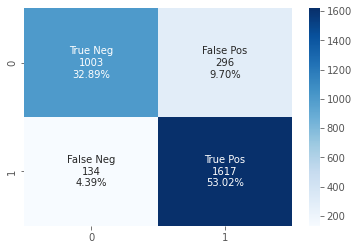

In [189]:
# Plot confusion matrix

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                confusion_matrix(y_test, y_pred).flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     confusion_matrix(y_test, y_pred).flatten()/np.sum(confusion_matrix(y_test, y_pred))]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(confusion_matrix(y_test, y_pred), annot=labels, fmt='', cmap="Blues"); #annot=True to annotate cells fmt: format



In [190]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.77      0.82      1299
           1       0.85      0.92      0.88      1751

    accuracy                           0.86      3050
   macro avg       0.86      0.85      0.85      3050
weighted avg       0.86      0.86      0.86      3050



In [191]:
print('***RESULTS ON TEST SET***')
print("precision: ", metrics.precision_score(y_test, y_pred)) # tp / (tp + fp)
print("recall: ", metrics.recall_score(y_test, y_pred)) # tp / (tp + fn)
print("f1_score: ", metrics.f1_score(y_test, y_pred)) #F1 = 2 * (precision * recall) / (precision + recall)
print("accuracy: ", metrics.accuracy_score(y_test, y_pred)) # (tp+tn)/m

print('***RESULTS ON TRAIN SET***')
print("f1_score: ", f1_score(y_train, best_model.predict(X_train)))   #F1 = 2 * (precision * recall) / (precision + recall)
print("precision: ", metrics.precision_score(y_train, best_model.predict(X_train))) # tp / (tp + fp)
print("recall: ", metrics.recall_score(y_train, best_model.predict(X_train))) # tp / (tp + fn)
print("accuracy: ", metrics.accuracy_score(y_train, best_model.predict(X_train))) # (tp+tn)/m

***RESULTS ON TEST SET***
precision:  0.8452692106638787
recall:  0.923472301541976
f1_score:  0.8826419213973798
accuracy:  0.8590163934426229
***RESULTS ON TRAIN SET***
f1_score:  0.8894618834080718
precision:  0.8492828088203811
recall:  0.9336314426923982
accuracy:  0.8693693693693694


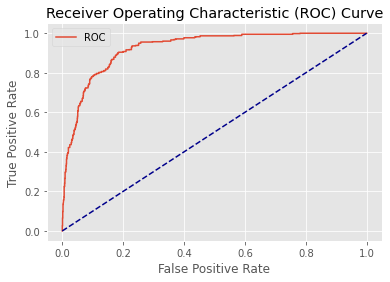

AUC for the test dataset is: 0.93
AUC for the train dataset is : 0.90


In [192]:
adaboost = AdaBoostClassifier(n_estimators=500, learning_rate=0.1)

adaboost.fit(X_train,y_train)

y_probs = adaboost.predict_proba(X_test) #predict_proba gives the probabilities for the target (0 and 1 in your case) 

fpr, tpr, thresholds=metrics.roc_curve(y_test,  y_probs[:,1])

plt.plot(fpr, tpr, label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

auc = metrics.roc_auc_score(y_test, y_probs[:,1])
print('AUC for the test dataset is: %.2f' % auc)

y_probs1 = model.predict_proba(X_train) #predict_proba gives the probabilities for the target (0 and 1 in your case) 
auc1 = metrics.roc_auc_score(y_train, y_probs1[:,1])
print('AUC for the train dataset is : %.2f' % auc1)